# EDA Tutorial - Indian Restaurants 

## Introduction

Exploratory Data Analysis (EDA) is a preliminary step of Machine Learning and is used extensively in this field. Although it is not necessary to perform EDA to build models, but it is definitely recommended as it helps to know the data better. If performed correctly, it gives us insights which are not easy to witness directly. 

In this notebook, I have performed a detailed analysis on Indian Restaurants Dataset from Zomato(<a href="https://www.kaggle.com/rabhar/zomato-restaurants-in-india">link</a>). This notebook can be used as a manual to perform basic to intermediate EDA on any dataset. Following are the things that you will learn from this project :-
1. Knowing basic composition of data
2. Removing duplicates
3. Dealing with missing values
4. Understanding features
5. Plotting horizontal bar charts (multicolor)
6. Using groupby, apply, and unique functions 
7. Scatter plot
8. Word Cloud
9. Box plot
10. Density plot
11. Bar Charts
12. Drawing insights and conclusions from data

Don't forget to upvote if you find this useful! :)

So without further ado, let's get started!

## Project outline

- Importing 
- Preprocessing
- - Exploring data
- - Removing duplicates
- - Dealing with missing values
- - Omitting not useful features
- EDA
- - Restaurant Chains
- - - Chains vs Outlets
- - - Top Restaurant Chains (by number of outlets)
- - - Top Restaurant Chains (by average ratings)
- - Establishment Types
- - - Number of Restaurants 
- - - Average Rating, Votes, and Photo count
- - Cities
- - - Number of Restaurants 
- - - Average Rating, Votes, and Photo count
- - Cuisine
- - - Total number of unique cuisines
- - - Number of Restaurants
- - - Highest rated cuisines
- - Highlights 
- - - Number of Restaurants
- - - Highest rated features
- - - Highlights wordcloud
- - Rating and cost
- - - Rating Distribution
- - - Average Cost for two distribution
- - - Price range count
- - - Relation between Average price for two and Rating
- - - Relation between Price Range and Rating
- - - Relation between Votes and Rating
- Conclusions

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud

## Preprocessing
### Exploring data

In [2]:
data = pd.read_csv("zomato_restaurants_in_India.csv")

In [3]:
data.head(10)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
9,3400838,Sugar N Thyme,['Café'],https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,...,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,Very Good,289,324,0.0,1,-1


In [4]:
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [5]:
data.city.nunique()

99

In [6]:
data.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [7]:
data[data["city"]=="Mumbai"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


In [8]:
data[data["city"]=="New Delhi"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
53884,18895645,Plum By Bent Chair,['Casual Dining'],https://www.zomato.com/ncr/plum-by-bent-chair-...,"The Walk, Worldmark 2, Aerocity, New Delhi",New Delhi,1,Aerocity,28.551540,77.122704,...,1,Rs.,"['Debit Card', 'Dinner', 'Cash', 'Credit Card'...",4.9,Excellent,1545,4321,0.0,-1,-1
53885,18429148,Pa Pa Ya,['Fine Dining'],https://www.zomato.com/ncr/pa-pa-ya-saket-new-...,"Dome, Level 4, Select Citywalk, A-3, District ...",New Delhi,1,"Select Citywalk Mall, Saket",28.528391,77.218611,...,4,Rs.,"['Credit Card', 'Debit Card', 'Lunch', 'Serves...",4.7,Excellent,3234,8344,0.0,-1,-1
53886,18418277,Ministry Of Beer,['Lounge'],https://www.zomato.com/ncr/ministry-of-beer-co...,"M 44, Outer Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633286,77.222787,...,3,Rs.,"['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...",4.5,Excellent,3043,9984,0.0,-1,-1
53887,18625812,Detroit,['Bar'],https://www.zomato.com/ncr/detroit-connaught-p...,"F40, 2nd Floor, Inner Circle, \nConnaught Plac...",New Delhi,1,Connaught Place,28.631357,77.220251,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.6,Excellent,1327,3255,0.0,-1,-1
53888,18423151,The Darzi Bar & Kitchen,['Casual Dining'],https://www.zomato.com/TheDarziBar?utm_source=...,"H 55, 1st Floor, Outer Circle, Connaught Place...",New Delhi,1,Connaught Place,28.635508,77.219096,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.3,Very Good,3211,9618,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59842,18372693,Three Tuns Cafe & Bar,['Casual Dining'],https://www.zomato.com/ncr/three-tuns-cafe-bar...,"2nd Floor, Unity One Mall, Near Janak Puri Wes...",New Delhi,1,"Unity One Mall, Janakpuri",28.628702,77.076617,...,3,Rs.,"['Debit Card', 'Takeaway Available', 'Dinner',...",4.4,Very Good,975,3139,0.0,-1,-1
59843,18523131,Too Indian,['Casual Dining'],https://www.zomato.com/ncr/too-indian-rajouri-...,"A 39, Vishal Enclave, Rajouri Garden, New Delhi",New Delhi,1,Rajouri Garden,28.650466,77.120146,...,3,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",4.0,Very Good,2037,7311,0.0,-1,-1
59844,307060,The Beer Cafe - BIGGIE,['Bar'],https://www.zomato.com/ncr/the-beer-cafe-biggi...,"D-2, Inner Circle, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633842,77.220804,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Credit Card', 'Di...",4.1,Very Good,1609,1120,0.0,-1,-1
59845,18500611,Sixth Empirica,['Casual Dining'],https://www.zomato.com/ncr/sixth-empirica-punj...,"Building 6, 2nd & 3rd Floor, NWA, Punjabi Bagh...",New Delhi,1,Punjabi Bagh,28.666524,77.123032,...,3,Rs.,"['Lunch', 'Debit Card', 'Dinner', 'Cash', 'Cre...",4.2,Very Good,1559,2791,0.0,-1,-1


In [9]:
data[data["city"]=="Pune"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [10]:
data.shape

(211944, 26)

Our dataset has 26 features and 0.2 million plus rows. Let's find out more about these features using the <b>info( )</b> function

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

We have many interesting features which can be great for analysis and also some which we will omit. The difference in count of some features gives us hint of some missing values. 
While <b>info( )</b> is used to know about count, null and type properties, <b>describe( )</b> gives us statistical information about numerical data.

In [12]:
data[data["average_cost_for_two"]==30000]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
136240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
136740,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
137240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1


In [13]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


### Removing duplicates
Its important to remove duplicate rows to avoid biasness in our analysis. Since res_id is unique identifier of our restaurants, we can use it to remove duplicates.

In [14]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [15]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape


(55568, 26)

Oops! Looks like almost 75% of our data had duplicate rows. Its good that we got that out before getting started. Even though we are left with 1/4th of our original dataset, about 55000+ restaurants is still good enough to perform analysis.
### Dealing with missing values
Now let's see how many variables have missing values.

In [16]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

We have 5 variables with some kind of missing values. 
Since zipcode has ~80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.
### Omitting not useful features
Here we will look at each feature and decide to consider them for our analysis or not:- 
1. <b>res_id</b> - Unique ID for each restaurant
2. <b>name</b> - Name is useful since we will use it to find top restaurants
3. <b>establishment</b> - Let's see what type of values we have in establishment

In [17]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [18]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with <b>apply( )</b> function.
Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [19]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


4. <b>url</b> - URL is the link to restaurant's page which is not useful for us
5. <b>address</b> - Not useful since it has long strings and its difficult to classify
6. <b>city</b> - Let's check unique cities

In [20]:
x=10
y=11

In [21]:
x==y

False

In [22]:
len(data[data["city"]=="Shimla"])

218

In [23]:
len(data[data["city"]=="Agra"])

833

In [24]:
len(data["city"].unique())

99

In [25]:
data["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [26]:
data[data["city"]=="Jabalpur"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
82579,18746666,RH Chicken Point,Quick Bites,https://www.zomato.com/jabalpur/rh-chicken-poi...,"Main Road, Sadar Bazaar, Cantt, Jabalpur",Jabalpur,11336,Cantt,23.154664,79.951015,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",4.5,Excellent,680,24,0.0,-1,-1
82580,18745503,Naidu's Dilli Ki Gali Parathe Wali,Quick Bites,https://www.zomato.com/jabalpur/naidus-dilli-k...,"Near Mahakaushal Chamber Bhawan, Marhathal, Ci...",Jabalpur,11336,Napier Town,23.169057,79.933869,...,1,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.7,Excellent,355,14,0.0,1,-1
82581,18815413,Riyaz Hotel - 1953,Quick Bites,https://www.zomato.com/jabalpur/riyaz-hotel-19...,"993, Badi Omti, Napier Town, Jabalpur",Jabalpur,11336,Napier Town,23.170673,79.937920,...,2,Rs.,"['Lunch', 'Takeaway Available', 'No Alcohol Av...",4.2,Very Good,542,9,0.0,-1,-1
82582,18746285,Badkul Restaurant,Casual Dining,https://www.zomato.com/jabalpur/badkul-restaur...,"103-105, Deendayal Chowk, Opposite ISBT, ITI R...",Jabalpur,11336,Vijay Nagar,23.193550,79.913353,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Cash', 'Ta...",4.0,Very Good,451,19,0.0,1,-1
82583,18825615,Popular Fresh Momos And More,Quick Bites,https://www.zomato.com/jabalpur/popular-fresh-...,"Home Science College Road, Napier Town, Jabalpur",Jabalpur,11336,Wright Town,23.160413,79.925240,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.1,Very Good,249,43,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85087,18890729,Muskan Family Restaurant,Casual Dining,https://www.zomato.com/jabalpur/muskan-family-...,"Civic Center, Near Bata Showroom, Marhataal, C...",Jabalpur,11336,Civil Lines,23.167616,79.932721,...,1,Rs.,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",0.0,Not rated,3,0,0.0,-1,-1
85088,18859783,Pawar's South Indian & Chines Food,Casual Dining,https://www.zomato.com/jabalpur/pawars-south-i...,"Shop No. 34, Ganjipura Chowk, Ganjipura, Jabal...",Jabalpur,11336,Cantt,23.173200,79.931319,...,1,Rs.,['Cash'],0.0,Not rated,2,0,0.0,-1,-1
85090,18859976,Swastik Restaurant,Casual Dining,https://www.zomato.com/jabalpur/swastik-restau...,"C/O Hotel Swastik, Building No 333, Napier Tow...",Jabalpur,11336,Cantt,23.162786,79.936645,...,1,Rs.,"['Cash', 'Credit Card', 'Debit Card']",0.0,Not rated,3,0,0.0,-1,-1
85091,18860323,Munna Yadav Bhojanalaya,Casual Dining,https://www.zomato.com/jabalpur/munna-yadav-bh...,"In Front Of Hotel Ankit, South, Civil Lines, J...",Jabalpur,11336,Cantt,23.161508,79.948811,...,1,Rs.,['Cash'],0.0,Not rated,2,0,0.0,-1,-1


Look's good. 
7. <b>city_id</b> - We can uniquely use city name or id. So one feature is enough
8. <b>locality</b> - Let's see number of unique values

In [27]:
data["locality"].nunique()

3731

Although it can be an interesting feature, but since this feature has so many unique classes, we will avoid it.
9. <b>latitude</b> - Can be helpful while using geographic maps, but we won't be doing that here
10. <b>longitude</b> - Same as above
11. <b>zipcode</b> - Approx 80% missing values
12. <b>country_id</b> - Since this dataset is for Indian restaurants, there should be just one unique id here. Let's check.

In [28]:
data["country_id"].unique()

array([1])

13. <b>locality_verbose</b> - Same as locality 

In [29]:
data["locality_verbose"].nunique()

3910

14. <b>cuisines</b> - This feature has some missing values. Even though this has 9382 unique classes, we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes. Let's check actual number of unique cuisine classes. But first we need to replace null values with a label.

In [30]:
print(data["cuisines"].nunique())
print(data["cuisines"].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [31]:
data["cuisines"] = data["cuisines"].fillna("No cuisine")

In [32]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


15. <b>timings</b> - This also has missing data, however it has 7740 unique classes. Also, it is not structured even if we try to reduce the number classes like we did in cuisines. Its better to omit it altogether.

In [33]:
print(data["timings"].nunique())
print(data["timings"].unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


16. <b>average_cost_for_two</b> - This is an interesting feature for our analysis, although the value "0" is strange and should be an outlier

In [34]:
data["average_cost_for_two"].nunique()

145

17. <b>price_range</b> - Average prices automatically characterized into bins

In [35]:
data["price_range"].unique()

array([2, 1, 3, 4])

18. <b>currency</b> - Only one class. Not useful

In [36]:
data["currency"].unique()

array(['Rs.'], dtype=object)

19. <b>highlights</b> - They represent certain features that the restaurant specializes in and wants to highlight to their customers. Each restaurant has a list of highlights which makes the composition different for each one. We can, filter this and find total unique highlights from all restaurants.

In [37]:
print(data["highlights"].nunique())
print(data["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [78]:
hl = []
data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


20. <b>aggregate_rating</b> - Rating given to the restaurant
21. <b>rating_text</b> - Characterisation of numeric rating into bins by using labels. We will be using direct ratings in our analysis, so we can ignore this.
22. <b>votes</b> - Number of votes contributing to the rating
23. <b>photo_count</b> - Photo uploads in reviews

Let's check the mean and range of above features

In [79]:
data[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


Rating ranges between 0 and 5 while 42539 are the maximum votes given to a restaurant. The negative value in votes might be an outlier.
24. <b>opentable_support</b> - Not useful since no restaurant has True value for this
25. <b>delivery</b> - This feature has 3 classes but there is no explanation for those classes. We can consider -1 and 0 to be one class or ignore this feature for now
26. <b>takeaway</b> - Again not useful since it only has one class

In [80]:
data["opentable_support"].unique()

array([ 0., nan])

In [81]:
data["delivery"].unique()

array([-1,  1,  0])

In [82]:
data["takeaway"].unique()

array([-1])

Now that we have taken a deep look at our data, let's start with some EDA!

## Exploratory Data Analysis (EDA)
### Restaurant chains
Here chains represent restaurants with more than one outlet
#### Chains vs Outlets

In [83]:
outlets = data["name"].value_counts()

In [84]:
outlets

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [85]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [86]:
data.shape

(55568, 26)

In [87]:
chains

name
Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: count, Length: 4890, dtype: int64

In [88]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


<b>35%</b> of total restaurants are part of some kind of restaurant chain. Here, we should account for cases where two different retaurants might have exact same name but are not related to each other.
#### Top restaurant chains (by number of outlets)
Let's plot a horizontal bar graph to look at Top 10 restaurant chains. For the color scheme, we are using a list of pre-defined and selected colours to make the chart more appealing. If you want your analysis to look good visually, you should customize each and every element of your graph.

In [89]:
chains.head(10)

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

In [90]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

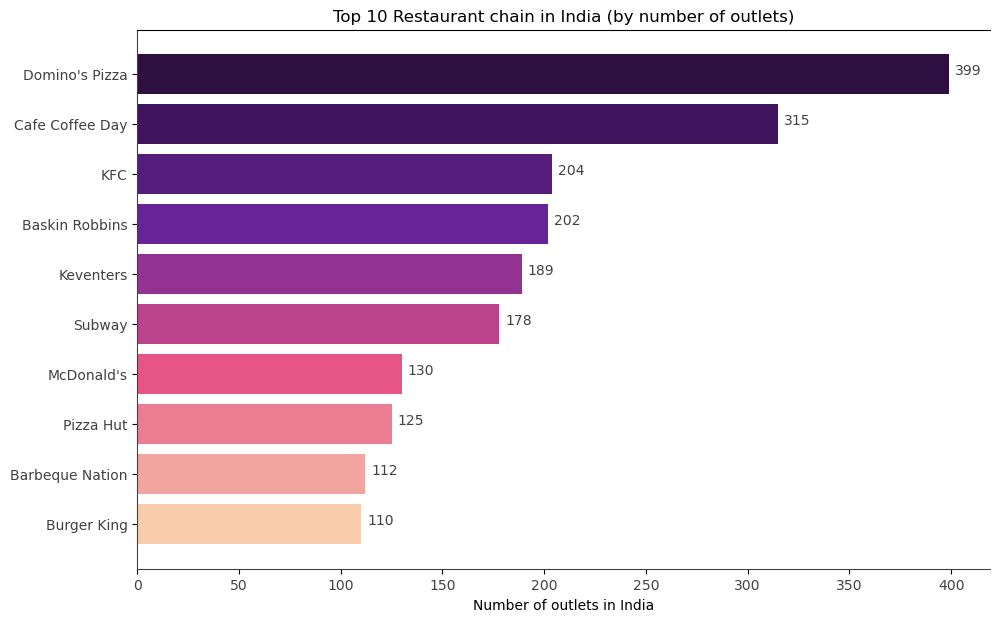

In [91]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

This chart is majorly dominaed by big fast food chains
#### Top restaurant chains (by average rating)
Here we will look at top chains by their ratings. I have set the criteria of number of outlets to greater than 4 to remove some outliers.

In [92]:
outlets = data["name"].value_counts()

In [93]:
atleast_5_outlets = outlets[outlets > 4]

In [94]:
data[data["name"].isin(atleast_5_outlets.index)].groupby("name").mean()

TypeError: Could not convert Casual DiningPubCasual DiningBarPubPubPubPubCasual DiningCasual Dining to numeric

In [64]:
atleast_5_outlets

name
Domino's Pizza               399
Cafe Coffee Day              315
KFC                          204
Baskin Robbins               202
Keventers                    189
                            ... 
Pasta Street                   5
Red Chilli Snacks & Bakes      5
Bake N Shake                   5
Mahavir Ice Cream              5
Hyderabad Biryani              5
Name: count, Length: 743, dtype: int64

In [70]:
data[data["name"].isin(atleast_5_outlets.index)].groupby("name").mean()["aggregate_rating"]

TypeError: Could not convert Casual DiningPubCasual DiningBarPubPubPubPubCasual DiningCasual Dining to numeric

In [62]:
top10_chains2 = data[data["name"].isin(atleast_5_outlets.index)].groupby("name").mean()["aggregate_rating"].sort_values(ascending=False)[:10].sort_values(ascending=True)

TypeError: Could not convert Casual DiningPubCasual DiningBarPubPubPubPubCasual DiningCasual Dining to numeric

In [ ]:
height = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
bars = top10_chains2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by average Rating)")


plt.show()

Interestingly, no fast food chain appears in this chart. To maintain a high rating, restaurants needs to provide superior service which becomes impossible with booming fast food restaurant in every street.

### Establishment Types
#### Number of restaurants (by establishment type)

In [ ]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

Top 3 represents more casual and quick service restaurants, then from 4-6 we have dessert based shops.
#### Average rating, votes and photos (by Establishment)
Here, we will not plot each graph since it will make this notebook filled with horizontal bar charts. I see horizontal bar charts the only option to display results of this kind when we have lots of classes to compare (here 10 classes). Let's look at <b>value_counts( )</b> directly

In [ ]:
rating_by_est = data.groupby("establishment").mean()["aggregate_rating"].sort_values(ascending=False)[:10]
rating_by_est

In [ ]:
# To check the number of outlets in each of the above establishment type, uncomment to following code

#est_count = data.groupby("establishment").count()["name"].sort_values(ascending=False)
#rating_by_est_map = est_count.index.isin(rating_by_est.index)
#est_count = est_count[rating_by_est_map][rating_by_est.index]
#est_count

In [55]:
data.groupby("establishment").mean()["votes"].sort_values(ascending=False)[:10]

TypeError: Could not convert Cake HouseRohit Cakes And BakesCake D'orDesire BakersCake RoomLick N Bite BakersNew Cake HouseFood ParadiseChef at Home BakeryCelebration  FoodsWatchMeWhipCake HouseGoverdhan BakeryAmbey BakersThe London BakeryBhagwan Corner Cakes And PastriesDreams Bakers ParadiseSanjay Bakers & ConfectionerCake HouseEuropean BakeryVaishno The Cake MakersBhaagya Shree Studio & BakersfnpCakes ‘n’ MoreDreams Bakers ParadiseCelebration FoodsSprinkle Bakery And Fast FoodGarg DairyFood TreasureDeep CornerShri Mahaveer Bakery And ConfectioneryPrince BakersBeloved BakersParis BakeryMoon BakersMaharaja Agrasen ConfectioneryAnant Krishna FoodsCake Housechhabra bake house & cafeShri Jagdamba BakersCakeshhRadhey govind bakeryBlue Bird BakersGupta Bakery & Sweet ShopAbhay Cake HouseHoney BakersRahul BakersYuwan Patiz HubDCD Cake HouseBakeologyCake FarmerJain PethaBlue Bird BakersGaurav BakersRajput BakersRahul BakersRaj Milk Product And SweetsDreamzChhabraSwagat BakeryAgarwal BakersYo Yo FoodsTN Bakes And BitesRS Eating HubMoolchand Grocery And BakeryMahaveer BakeryMr. KukoosBlue Bird bakersThakur Nath ConfectionaryParis BakeryMama Cake HouseMonu BakeryKrishna Bakers & ConfectionersS G BakersNarayani BakeryMoti BakeryBiskutKabhi BMongini'sMongini'sMongini'sCocoa DramaVanilla The Cake ShopHouse of CakesBrown & HappyKabhi BKabhi BKabhi BLe Artisan BoulangerieCafe Upper CrustCake My DayBrownie PointMoi - The Dessert StudioUpper CrustGolden BrownXocolat Chocolatiers Cafe & BakeryGwalia BaklawaMr. PuffThe Home Cake StudioThe Bake House By UmmedTGB Cafe n BakeryKhyati's CakeGulshan Bakery & SweetsHappiness By Bake My DayRoyal BakersSwami Foods & BakersMamta Cakes & BakesSugar N SpiceShiv Shankar BakeryMamta Cakes & BakesThe Cake HouseSunrise BakersShree Ram NamkeenRoyal BakersVijay BakeryVijay Bakers & ConfectionersMamta Cake and BakesBrown BakeRoyal BakersCreamy DelightsHare Krishna ConfectionersDelux BakeryMamta Cakes And BakesManan FoodsRamesh Food ProductCutiepieHimalaya Bake & MoreA to Z BakeryThe Cake LandAmma's BakeryJilebi BakerySweet Park BakeryHimalaya BakeryBoss BakesSha BakeryKrishna BakeryBright BakerySree Sabari BakeryZiyah Cakes and BakesAsoka BakeryBest BakeryLittle FlowerBrufiaBest BakeryElleff BakeryKarunya BakeryChoice BakeryHimalaya BakeryTown BakeryMoon Bakers and JuicePremier BakeryRoyal BakeryKarthik BakeryIndian Bake HouseWinner BakeryT Break BakeryMasha Allah BakeryAswathi BakeryKanavas BakerySona BakerySR BakeryPolonia BakeryBrufia BakeryKichoos BakerySharjah Teashop and BakeryKovoor BakesBadariya CoolbarAlayance BakeryManjula BakeryBest BakeryThulasi BakeryAsoka BakersAl-Mafas BakersBest BakeryIglooz BakeryShifa BakeryTasty CakeHalfa Spot BakersAbi's BakeryPriya's Hot OvenAjmal Bakery & Fast FoodSilver Scoop BakersPremier BakersBreadz And CakezFortune BakesPawan Namkeen & BakersKunj Paneer Kendra The Cake PalaceDelight MuffinsOccasionBest BakeryThe Hunt BakersDelight The Pastry ShopTop In TownRoute O BakersRoute O BakersTop-In-Town Baker'sShubhi's Bake A WishfnpCakes ‘n’ moreJK BakersRoute o BakersMamta BakeryStatesman HouseLallu Baker's HutBakers BakeryChoco PainLallu Baker's HutSudha BakersFORNO Cafe and loungeManbhari Food MartGoodday's Cakes & CookiesGolden BakeryCake and BakeOm cake shopThe Cake AvenueRoll-in Baker'sKrown BakersChalk Story BakeryAsk Pure Cake HouseBeyond Temptation- CampDesserts & MoreJugal FoodsManbhari Food MartThe Chocolate heavenManbhari food MartCAKE GALLERYBurhanpur Jalebi And Juice CentreOne More BiteBeyond Temptation - Rukmini Nagarforno cafeAsk Pure Cake HouseShiv Sweet's and CakesTasty farm - BakeryManbhari Food MartCoffee Cave ( Skylight Coffees )Cafe Coffee DayBliss n blessLife BakeryBlues BakersBaked Alaska- Humble HotelsThe Prince BakerAmrit Pastry ShopMy Cake ShopBakery BitesNarang BakeryPopular BakeryArora BakersLittle Princess TreasuresBB - Brother BakeryPanbucksCake A LiciousFlourfairyIn n Out BakersThe  BakersBasant La PatisserieBakewell BakersBrew BakersAman BakryGupta BakeryGrover BakersMonga BakersMohan BakeryBhagwati BakersMorsels BakeryBakersDeli Pastry Lounge - Holiday InnStandard BakersNarang BakeryPlaza BakeryPreet Bakers And DairySugar N SpiceJust BakedShri Shah BakerThe Village BakersClassic Pizza and BakersSmiley BakersOm Bakers PointPrathmesh Food ProductsArihant Cake & CookiesMonginisMonginisCake 'n' BakeCafe BakersMonginisMonginisThe Cake FactoryRevelry -The Cake HouseMonginisMonginisCake 'n' BakeLakhotiya's CakesGolden Star BakeryBaba Cake ShopDelite Oven FreshMonginisLucky BakersMansi BakersKwality Oven FreshOven BakeKrispy Kream The Cake ShopVeg Baker'sPankajkumar and SonsNew Zoom BakersMaya BakeryW S BakersWelcome BakersGolden FoodsMonginisDelite Foods And CakesW S BakersZ BakersDream BakersAj Baker'sSk Cake BakersCakeddictionGlen's BakehouseBread & BetterO.G. Variar & SonsThe French LoafWinni- Cakes n MoreGlen's BakehouseGlen's BakehouseCake ZoneChef Baker'sHappy EndingsCakewalaV B BakeryAlbert BakeryCakewalaHappy Belly BakesCake ZoneThe Sugar FairySoul TreatChef Baker'sCNS PastriesThom's BakeryOccasionsAmma's PastriesHappy EndingsSweet ChariotCake ZoneWarm OvenChocoberryCakestaBaker's HomeChef Baker'sCake ZoneWarm OvenChef Baker'sKarachi BakeryBread Crumbs BakeryCake CafeJust BakeCremeeChef Baker'sBakers AbodeLemon KrustThe French LoafMessy EatsChef Baker'sAmma's PastriesGlen's BakehouseBudapest Bake InnJust BakeBun WorldJust BakePatisserie NitashThe Rolling PinAmma's PastriesThe French LoafCariocakeCake BoxAmma's PastriesIndulge CupcakesCafe De GourmetLa HeavenThe Bakers TableFlying CakesThe French LoafCarlos Cake CafeGrubshackWarm OvenWarm OvenCookie ManAmma's PastriesAtty's BakeryCreme BlissCake Town CafeAmma's PastriesAmma's PastriesChef Baker'sKwality Cakes N BakesMore Than ChocolatesCake DilimJust BakeSweet TruthKoshy'sAmer Bakery Hut (ABH)Amer Bakery Hut (ABH)Baker's CastleBhopal Baking CompanySanjay Fresh BakeViolet HourBreads & StoriesFresh BakeJai Hind BakeryOut Of OvenSugar Side UpFluffy Bake EatsThe Frozzen Hut | Waffle HutOmni BakersBakery VakeryOmni BakersUrban TohfaJhulelal BakeryWonder BreadBaked @186°Cfantasy Bakery shopAmer Bakery HutAbakingMangalam ProteinsBakesmiths Baker's And RoasterCakes 24Blue Heaven Cakes & FlowersGurukripa CelebrationNarmada BakersHBT BakerySindh Krishna BakerySiyaram BakeryHBT BakeryBhagat BakersYash Bakers and ProteinsA1 BakersMilan BakerySugar Side UpThe Baker's HomeShivam Cake ParlourRajhans Regent BakeryIshwar BakeryFriends Cake ShopKwality BakersCakeFizzKavya Sweets And BakeryBhopal Baking CompanyUdi Baker'sBig Byte BakersChocolotDeepak Eat FreshCakes N MoreYummy BakersMonsy's Baking HubJ B Baker'sJai Kapish BakeryPrince BakeryChoco LustCalorie BoxGolden BakersDream Cream Bakery and ParlourChocoteriaRoshni's CakeryMi AmorBake ShopShree Ganesh Food PlazaMonginis Cake ShopBakers DelightBake ShopSugar & SpiceGoodies Bakers & ConfectioneryBake ShopCookiesRoastaBaker's ByteBake ShakeParis BakeryMio AmoreBritish BakeryParis BakeryBrewBakes 7 Sky99 Bakers StreetGo CoolCoffeekeryHoney BlissItalian Bakery CafeCoffeekeryHoney BlissMio AmoreMio AmoreTen Minutes - Pal HeightsCream & SpicyCookies PremiumFirangi MithaiThe Cake RoomMio AmoreMonginis Cake ShopMio AmoreMio AmoreMio AmoreMio AmoreSquish Chinese Food CourtBrew BakesBake ShopAngel BakeryArtsy TartsyMio AmoreCake ShopParis BakeryMio AmoreMonginis Cake ShopParis BakeryParis BakeryCookiesCookiesAmigos BakeryMoginisParis BakeryBakers DeliteZ BakeryAmelie’s Bake ShopMonginisParis BakeryMonginis Cake ShopEssar Cake N CafeNew SensationsKing's The Cake ShopCookiesMio AmoreBakers ForcourtThe Cake BakeBerryParis BakeryBakersBakersMonginis- Suprit BakeryQ BakesNik Baker'sNational BakersThe BakersCapital BakeryBest BakersShri Gopal Ji BakersCookie's Jar By Geet And VirCrumbsNik Baker'sClassic 44Real BakeryGolden BakeryCakes 'O' ClockCakes & Shakes7th HeavenLittle HungerUttam's Bakery & RestaurantCake n BakePooja Sweet Bakers & Fast FoodNik Baker'sBaker's LoungeNik Baker'sMom Baker'sNik Baker'sNik Baker'sAmrit ConfectionersMonica's Puddings & PiesBakers HutLet's Go DutchCupid Cake'sLet's Go DutchMonica's Puddings & PiesHalf BakedMom Baker'sGulati BakersFriends BakerD'ChocolatierClassic 44BuddiesPunjab Bakers & ConfectioneryLondon BakersSonia's Cakes N AllKamal & Kamal ConfectionerPetite SweetBaker's LoungeBN BakersMonica's Puddings & PiesVinnie'sBansal NamkeenPolka Pastry ShopCakes 'N' StuffChoco ObsessionNational BakersKandy's Pastry ParlourClassic 44Lezzetli Bakery & CafeBaker's LoungeClassic 44Nik Baker'sBakers Bite CafeCakeAReuniNoor Dairy & CakesUrban FoodiesHarpreet ConfectionerySingh SonsNational BakeryPolka -The Cake ShopLe Petit Cafe - The Lalit ChandigarhCravingsLe Meilleur BakeryKreative Chocolates35 Baker's StreetPolka The Cake ShopClassic 44Sweet NothingsNational Baker'sNarula BakeryThe German BakersThe Galaxy Bakers & Fast FoodChief BakersSweet SensationsThe Chocolate JarFantastic Food & BakerySindhi Pastry ShopLovely Sweets & BakersFresh Baked GoodnessCake WalkOvenfreshThe TableOld Madras Baking CompanyWinner's BakeryThe Cupcake CompanyOvenfreshBakealiciousParfait 3OvenfreshLa ChocolateOld Madras Baking CompanyBakers SpringThe Cupcake HouseThe Baker's NookCake WalkThe French LoafFrost GoddessOvenfreshCake SquareFB Cake House & SweetsChocomansButtonsFresh Cakes by BakerzohCK's BakeryBaker's CafeOld Madras Baking CompanyOvenfreshThe French LoafThe CreamsThe Baker NinjaLa ChocolateCakeBeeCakes and BerrysBakers CottageBaker's Code CafeLa ChocolateSift and SpoonNutmeg The Gourmet Shop - ITC Grand CholaBerry 'n' BlossomLes CroissantsBerry 'n' BlossomPrima'sCake SquareThe Cake StudioRotticiousLava CakesNimi's OvenCake ParadiseCake a LishiousAdyar BakeryBlueberry PastriesCK's BakeryThe Brownie StudioThe French LoafCake WavesCK's BakeryPrima'sCK's BakeryOld Madras Baking CompanyCake ParkThe Cake BakersCake SquareJeanne FerrerCakes & PiesPastry ManiaaCake SquareOvenfreshThe French LoafCookie ManThe French LoafBon ChocolateThe Brownie StudioLa ChocolateCK's BakeryFB Cake HouseThe Cake ForestThe French LoafThe CupcakeryFlake n BakeBaker's DelightNibblesThe French LoafCocoa CrustBlondies & Brownies by Baker's LaneCasa DolceThe Brownie ClubMellow CafeThe French LoafCK's BakeryCupcake ExpressBosotto BrosCake My DayThe Cake World Duetche BakeryMillies CookiesCake SquareIrfi Cake and CafeCake SquareBakers Basket - The Savera HotelDelight Cake ShopG Surya Narayana Snacks CentreAnjali Bakery & SweetsKaanchi Bakers & SweetsCakeBeeLongitude - Le MeridienPriyadarshini BakeryCity Cake ShopSri Maha Lakshmi BakerySona BakesBalan Tea Stall And BakeryV.P BakeryCity Cake ShopCity Cake ShopMS BakeryMahalakshmi BakersSanthosh Bakery & Fruit StallSabari BakeryNew Sri Krishna BakeryGanga BakeryS.V.S BakeryAasai BakesAsai BakeryK.S. BakeryRamesh BakeryCovai CafeBee BakersCake StreetAyyar & CoAyyar & CoSitra CafeSai CakesRed Chilli Snacks & BakesAroma BakeryAroma BakeryLJ Iyengars Cake ShopSree Vasanthi BakeryGanapathi's DelightRed Chilli Snacks & BakesFood GardenNS BakeryWinner BakeryAroma BakeryIndo Maple LeafRanis Hotel & BakeryKR BakesChocko ChozaBaker StreetBaker StreetChocko ChozaThe CakewalkBaker Street CakesSri Mahalakshmi BakerySai Deep SweetsNellai Muthu Vilas Sweets And BakersCakeBee7th Heaven Cake ShopChocolate & SuchFriend In KneadNilas CakeJR Cakes & BakesJust BakeCakeBeeCK'S BakeryAPUPABakes N ChocsOven FreshRagam BakersBread OneVKS RestaurantCaramel BakesThe Cake PointCall For CakeRagam Cake ShopAM BakesGrace N BakesOrange BakesThe Cake PointCakes N CreamsShri Balaji BakeryThe Cake PointParsley Bakery And Cake ShopKovai KRS BakeryAroma BakeryKR BakesCK'S BakeryFirangi BakeCookie ManPaasham CakesRed Cherry's BakeryAroma BakeryBreeze Bake & CafeRanis HotelKR BakesJust BakeJust BakeEat A LotCall For CakeThe Cake PointRed Chilli Snacks & BakesKR BakesRagam Cake ShopAroma BakeryAroma BakeryAroma BakeryThangu Cake ShopJM BakesCall For CakeCK's BakeryScent FactoryModern BakesAmmas PastriesCovai CafeRed Chilli Snacks & BakesCake SquareMelrose Bake HouseAR BakesJM Cake ShopCake SquareN.S.R. BakeryCall For CakeRagam BakersSai CakesBake ShakeV BakersCafe D' LiteMi AmoreKrishna Sai BakeryBake ShopMonginisMonginisMonginisCake BazaarBaker's DeliteMio AmoreMio AmoreFrozitNayak & Nayak Snacks PointTruffles BakeryMonginis Cake ShopMoginisCrown BakeryMio AmoreBake ShopBake ShopSnacks Dot ComGlenary's BakeryBoney'sMio AmoreDiamond BakeryRaju BakeyMillenium BakeryArbaaz StoresEllora's Melting MomentsNany's BakeryThe Buffet Snack ShopEddie's PatisserieBakeMastersOld Ellora's Bakers and ConfectionersStandard Bakers ProductsHimalayan BakersSunrise BakersThe Bun BasketEltham Bakery & Coffee HouseJanta BakersAarush Chocolate CornerStandard Bakers & Fast FoodDoon Mughlai - A Family RestaurantUniyal BakersEllora HomeaidsFlavour BakersBhatia Sweet HouseGlobe BakersThe Cake RoomDoon Bakers and ConfectionersPerfect CravingsStandard BakersKuks N BakesGrand Bakers & ConfectionersVikas Bakers & ConfectionersEllorasCravityDelight BakersThe Oven BakeryThe Global BakersEat CakeDoon Memories Restaurant BakersNew Venus Bakers & Sweet CornerPindi BakersStandard Bakers & Fast FoodDoon Memories Bakers & CafeStandard's BakeryAll BakedKatiyar Bake ShopMerriment BakersAnjali BakersBaker's & CafeBakes & Cooke'sThe Sunder'sFros BakersGods KitchenNirmal BakersSugar Free Cafe and BakersRefreshing CentreDoon Memories Cakes & CookiesPearl BakeryDivyansh Cake SuperiorUttar Sweets & BakersEver BakeMr. Crust BakersKa Eclairs & KafeThe Big Chill CakeryWhippedThe Big Chill CakeryL'OpéraWhippedChoko laL'Opéra Salon de ThéWenger'sNik BakersTheobromaTheobromaThe Cake StoryNik Baker'sMaxims Pastry ShopSweet Obsession BakeryWenger's DeliFor God's CakeAngels in my KitchenMr. BrownTheobromaMr. BrownDukes Patisserie & BoulangerieSugarama PatisserieThe BombaykeryThe Cake CompanyFat Butterfly Bakery And CafeOtik Cake ShopTheobromaThe CUPnCAKE FactoryDonald's Pastry ShopBisque BakeryMr. Crust BakersAngels in my KitchenSugarLiciousTheobromaThe Cakecity PatisserieDonald's Pastry ShopTop BreadsTheobromaBeyond BreadsBake HubHarish BakeryGodavari BakeryTheobromaTasty TweetsBread TalkSibang BakeryThe Chocolate VillaPink BoxManohar BikkaneriGaurav Pastry PalaceOpen OvenHoney & DoughTheobromaSehgal Pastry ShopThe Cake PointBakers OvenMaster's Cakes And SweetsDemouldUnique Pastry ShopBread & MoreBakingtonBake Bun BikisL'OpéraKream'sBakingoAngels in my KitchenCake PalaceSoni BakersThe Artful BakerPastry PalaceSibang BakeryBajaj BakersPansy Cakes & ConfectionersSugarama PatisserieL'OpéraShugaaDecadenzBakes N BerriesDessertvalaRainbowsKaptain BakeryLa MiaYe Old Bakery - The ClaridgesFlurys - The ParkThe Pastry Shop - Radisson Blu Plaza Delhi AirportNew Town Pastry Shop - Park PlazaHoney & DoughKailash StoreBaweja's Cakes N BakesThe Cake BasketCake DesireCake DesireSuper BakeryFlying CakesCake 24x7Vero Gusto CakeyanoMiglaniCake 24x7Cake PointFlying CakesJimmy's Bakery & CaféBakes and BrewsLhamo's CroissantSharma's BakersSurya Cake & CookiesThe Old German BakeryCafé TibetAroma Bakery & CafeThe Pastry DenThe Pastry ShopBakes & BakersMr. BakersWoeser BakeryTibet Quality BakeryThe Pastry ShopLama BakeryBaker's CafeBaker's CafeCacaoBaker's CafeTripti'sOven in the MountainBuon AppetitoHills Bakery & CafeBig Bread BakeryPatisserie VictoriaDark SensationAngel's BakeryMonginisMonginisBakers Street GoaPatisserie VictoriaSimonia'sMarc Brown CaféLa BelleMr. Baker 19227th HeavenCafe CentralBritto's BakeryMyles High BakehouseArtisan BackereiGerman BakeryPastry CottageSugarliciousTrufflesMog cake studio+ All things goodJila BakeryPastry CottageA PastelariaPastry PalaceThe Bakery DivisionMonginisPastry CottageBaked FusionMonginisMonginisGerman BakeryMonginisCafé Ave MariaSweet Dreams BakeryBasssera BakeryCafe CentralMaster Chef7th HeavenMonginisSweetPeepsMonginisMonginisUrvi's Angelic BakesDolce AmoreFoody BreaksMonginisMonginisMonginisDesserts n MoreMonginisMonginisCafe JackrisJ K BakesFelicidade Cakes Bakes and MoreBellsMonginisMonginisCafe JackrisJude's Goan BakesGovekar BakeryMonginisMonginisPrasad BakeryMonginisMonginisMonginisLloyd Ralf Bakery CafeMonginisMonginisVaz Bakers- By The TemptationMonginisSweet Dreams BakeryAnjona BakeryMonginisMonginisMonginisMerakiMonginisMonginisPastry PalaceMonginisMonginisMonginisNew Bangalore IyengarsMonginisMonginisMonginisJJ Bakery & SweetsMonginisXavier PastriesCafe Royal & BakersApple Cafe & BakeryBake BrownShiv Ganga BakersCake O HolicsDanaram Bakers and Fast foodShree Luxmi BakersKrishna BakersBuddy's Cafe & BistroApple BakersGood BakersQuality Dry FruitsModella BakersThe Cake ExpressCake O HolicsDaya Dry Fruits & Bakery CenterGood BakersR.K BakersModern Bakers and SweetsMoms BakersManoranjan Baker'sManas BakersMom's BakeryBake Brown Bakers & SnacksAshoka BakersNew Maonranjan Bakers & SweetsThe bread boxThe Cake ExpressManoranjan Bakers7th HeavenChowdhry Sweet & BakeryBobi's bakeryShanti SweetsManoranjan Cakes BakesLotus BakeryCake O HolicsKing BakersThe Bread BoxShri Neelkanth Sweets & RestaurantsAngel Bakers N CafeWings BakersNew Manoranjan Sweets & BakersLittle HungerVaibhav Bakers And Fast FoodGanesh BakersNitish BiscuitHimalaya BakeryGorakhpur Coffee HouseMeera BakersChoice BakersKayshap Freezer & Baker'sMaa Vaishnav BakersAnnapurna BakersVM2 BakersAnjali Sweets & BakerIce BergBakers ShoppeSri Vijaya City Sweets & BakeryJust BakeSri Veda Sweets, Bakery & Fast FoodThe Bread BasketShanti Sweets and BakeryBread HutBakers FunBakers FunMadhuram Bakers & Fast FoodsJust BakeSai Ram FoodsBakers FunBake Feast Sweets HubPatisserie OperaaEggsotic Pastry ShopSuchitra BakeryRepose - Baker's SpecialMadhuban Sweets & BakersCheesersMilton BakeryMangaramPrime BakesLoyansRepose - Baker's SpecialBaker'sBrown CreamsBrown CreamsBrown CreamsEggsoticStyle O CakeThe Sugar ButterflyCake CornerRepose -  Baker's SpecialRepose - Baker's SpecialRepose BakeryRepose - Baker's SpecialTitiksha's Bake JunctionApple PieSpring ValleyPrime BakesDolce - Hotel Radisson BluBrown CreamsLoyansRepose BakeryLoyansLoyansRepose - Baker's SpecialRepose BakeryRepose Baker's SpecialPrime BakesToostee's Cakes And BakesPrime BakesBoutique Bakery - DynastyRepose Baker's SpecialGuwahati BakeryToasteasBaithak - Hotel RajmahalToostee's Cakes And BakesPatisserie OperaaAmbrosiaPrime BakesPureGuwahati BakeryEggsoticAir Chef Private LimitedA-One Bakery And ConfectioneryCorner BakeryStandard bakeryCook's Fast Food & BakeryLama BakeryLazeez Restaurant & BakersMansi BakeryCakes & Snacks - Jai Anand PlazaBakers VillaFriends BakersBest BakersGurukripa Cakes & BakesRohit BakersSonal BakersNirankari BakeryLush Eggless Cookies N CakesBest Namkeen & BakersShri Ram Departmental Store & BakeryRoyal BakeryGrains 'n' BeansGrains 'n' BeansFNP Cakes N MoreBest Namkeen & BakersT India Cafe and BakeryRelish BakersNirankari BakeryRelish BakersBaba BakeryKrispy Bakers And NamkeenCake Shakes And JuiceGlorious BakersShree Ram Sweets And SnacksCakes n BakesAahar Fast FoodVishnu BakeryMahesh BakeryBest Namkeen & BakersClarks Bakers- Clarks Inn SuitesKremy Kraft - Amrat BakersBest Namkeen & BakersB K Bakery Fast FoodBest Namkeen And BakersBrijwasi Sweets and NamkeenThe Cake Boss BakersRelish BakersKremy Kraft - Amrat BakersBasant BakeryJai Durge BakeryAnand Cakes and SnacksGrains 'n' BeansB2BAnand Mini MartJimjam Bakers and DryfruitSethi StoreAnand Metro MartCakes & BakesSethi Bakers and ConfectionersCakes & BakesThe Ganga Premium Pan BakeryCrazy's CakesSethi Bakers & ConfectionersThe Ganga BakeryGood Morning Confectioners & BakersCaptains Bakery & CafeTreat Fast FoodSwastik Confectioner And Ice Cream ParlourSethi BakersGood Morning ConfectionersBrown HutBrown HutSethi Bakers and ConfectionersA - 1 Confectionary & BakeryMithus Bakers & Fast FoodArora Confectioners & BakersCelebration BakeryChachaji The Cake & Bakery ShoppePooja Sweets & NamkeensStandard Bakers And ConfectionersSethi Bakers and ConfectionersCLICK 7Fortune DeliAhuja Pastry ShopOm BakersChacha Ji BakeryShivani BakersSangam ConfectionerVineela Yadlapalli CakesSarvi Bakers & RestaurantPastel Baking CoPanchratan BakeryShivanand BakersQuba BakeryMGM BakeryAmmu's BakeryCrystal Sweets & BakeryConçuTrio-La PatisserieNimrah Cafe And BakeryGourmet BaklavaSubhan BakeryCafe Niloufer & BakersGuilt TripEuphoriaKarachi BakeryKarachi BakeryKing And Cardinal BakeryCafe NilouferVac's PatisserieZaika Restaurant And BakeryKarachi BakeryJust BakeCorner BakersSahara BakersTipsy Topsy BakersKS BakersKS BakersUniversal Restaurant & Bakery StoreLabonelKS BakersBrownBearKS BakersBrownBearVelvet PatisserieGuilt TripEclaireGuilt TripGuilt Trip5th Avenue BakersShreemaya CelebrationShreemaya CelebrationParag Bakery & Fast FoodIndore Baking Company - Indore Marriott HotelBombay BakeryRK bakersThe Happiness CornerBabu Bakery and Dudh DairySimi'sMasters Bakery KrozzonShreemaya CelebrityCakesmith's AlleyCakes & MoreCake's ValleyDev's BakeryCake BoutiqueCakes N' CraftLucky BakersLSD - Love Sugar & DoughCakes N' CraftCakes N' CraftCakes N' CraftCakes N CraftPerfect BakeryBakers LoungeBake Well Bakery ShopNafees BakersCake Me AwayJain's Trupti Bakes N BeansNafees BakeryCakes 365The RJ's Bakery & Cake ShopThe RJ's EverfreshThe Baking RoomBaked InnPeace of CakeDev's BakeryKhurana'sFantasy24 Hours Bakery ShopBaker's LoungeCake's ValleyDev's BakeryDev's BakeryOccasion - Hotel Amar Vilas420 BitesCake BoutiqueDev's BakeryMini Me BakersBakery BitesCake MakersKerala Sweets BakerySweet Little BakeryLittle ChicagoPuff N Plum BakeryAjanta BakeryMonica Bakers & Fast FoodCake Central By Cakesmith's AlleyRed Maple BakeryMaan BakeryBittu's BakesThe Little Box BakeryPastry Pop BakersKing of CakesCakes 365Red Maple BakeryPastry ParlorCakes 365Hot And chillJain's Trupti Bakes N BeansMy Choice Cafe & BakeryGurukripa Bakery & NamkeenHappy Oven BakeryPapa BakeryEat A TreatCM9 BakeryCake Me Up - Hotel WOWShree Krishna CakesKND BakeryHot TreatThe Jain's CakeryBaker StreetCake DecorShrinathBaker StreetStar BakeryBaker StreetThe Masterpiece CakeryBaker StreetBake VillaHira Cakes4 Seasons BakeryThe Cake CompanyMaruti Bakers & Icecream7 ElevenFresh N Fresh BakersSuresh BakeryYogi's Hira Sweets & Hot BakersBake VillaChandrakala RetreatHira's Cakes 'N' CookiesfnpCakes 'n' MorefnpCakes 'n' MoreBaked StoryIndore Sweets Namkeen & BakeryHira Cake's Dry FruitsModern Rose BakeryDessert Valley Bakery & SweetsEat N Love BakersDeepak BakeryGulrez BakeryThe Lalits BakerySweet SensationsVenus BakeryOne Two Ka FourSunshine BakeryFat Guyy PâtisseriePetite PatisserieVenus The Cake ShopCake ManiaSunrise Bakers & ConfectionersBarkha BakersRoyal BakeryMiss Baker'sBake HutMafix Cakes & BakesCakes N CookiesThe CrustSunday's Bakers & ConfectionersShiv Shakti BakersJaipur Hot BreadsCake Bank BakeryGanacheShree Radhey BakersCake CornerR R BakersThe CrustRoyal BakeryVictorian BakeryPixie DustJMD Bakery & Fast FoodThe CrustOm Khushal BakerySST Cakes & CookiesMiss Baker'sCake HutSunrise Bakers & ConfectionersThe Wish BoxKrishna Bakers & Fast FoodCake WorldMetro BakeryDotCake WorldCake AddaFrench BakersMiss Baker'sChoco ChériThe CrustSatisfaction BakersBake HutThe Bakery - Holiday Inn JaipurCake MeCake TownJaipur BakersCake BreakShri Khushal BakeryCake MeShree Radhey BakersGauranga BakersPandit Pav Bhaji Bakery & Fast FoodKrishna BakeryMini's Baker's HubCake CultureSunrise Bakers & ConfectionersKrishna's BakerySunrise Bakers & ConfectionersBaker's BasketAunty Ki BakerySatnam Cake &  BakersHow SweetShiv Shakti BakersSunday's Bakers & ConfectionersStrawberryCake CornerLe Gourmet Lounge - The Fern HotelDivine Cakes & Fast FoodSprinklesSunrise Bakers & ConfectionersShree Radhey BakersKGN Bakers And CafeBakeoliciousCakeWalaCake PointBhartiya BakeryKarni - Sweets, Bakery & Fast FoodEnglish VinglishLovely Bake StudioNik Baker'sBedi BakersAM PM BakersParveen's Bakers And ConfectionersBig Wish BoxSweet Art BakersBittu BakeryFnP Cakes and MoreJust Cake 'N' BakeCake HouseKumar Cake HouseFancy Bakers ClassicHumm Bakerz And RestaurantMakkar Bakers & ConfectioneryKumar Cake House- Giardino CafeNew Cake housePatisserieSabharwal Bakers and Food PlazaKuku bakery cakesDashmesh BakeryMadhur Bakers & Food JunctionJass BakersRana BakeryDuggal Cake HouseBlack VanillaLovely Bake StudioKumar Cake House- Giardino CafeKrishna BakeryChawla BakersDashmesh BakeryDaily Tip Top BakeryCookie Crumb Bakers & CafeThe BrewbakersPradhan Sweets & BakersDayal HouseCreme CraftPrabhu Cake HouseElite Baker's & SnacksGiri Raj Bakers & SnackersZaira BakersHans BakersRoyal BakeryPrime BakesJai Hind BakeryRenuka's CakesFat Boy CafePremier's Cake WalkBaker's AvenueNew Krishna BakeryManohar Bakery & Food PointIndia Cake HouseCherries n BerriesBakers 'Я' UsPride BakesSharma Cake HouseMy Shop - Ferns N PetalsFantastic RefreshmentCakes 'M' MoreBalgotra Cakes N Bakes39 BakersFortune DeliBaker StreetHealthy Delight Bakers & SweetsBe FreshPremier's Cake WalkPemier CakesGiriraj bakersVida BakersBaker StreetHealthy Delight Bakersthe shake makerRajlaxmi BakersRajlaxmi Cake ShopAshok BakeryBakery BitesPatel Farsan & BakersShalimar's BakersStar Baker's & DairyManubhai's Rajlaxmi Cake ShopShri Laxmi BakersAshapura BakersRajaveer Bake PointShafiyan BakersVishal BakersKK Baker'sRonak BakersShri Rajavir Bake ShopBrubeck BakeryBrown Bunch BakeryBaking BondRelishBrunch ItalinoCakes & BakesIndian BakeryIndian BakeryCake CafeKamal BakeryBakery & Ice Cream ParlorLove BakeryNeha BakeryCakes & BakesCakes & BakesCakes & BakesRavi BakersBrown Bunch BakerySweet & SaltNational BakeryTOPPINGSBrunch ItalianoBakery HouseBakery BasketCocoberryNew Dolphin BakeryToppingsCakes & BakesBrown Bunch BakeryIcy BakersNuggets HeartThe Cookie CornerCity BakeryCakes & BakesNuggets HeartBakery HouseRoyal BakeryBakery BasketSwish BakeryLuv Bites BakeryBhola BakeryNew Max BakeryLuv Bites BakeryBakery & Ice Cream ParlourFriends BakeSnack ZoneJwala Food BeveragesOm BakeryNew Star Bakery7th HeavenBhatia Namkeen & BakersStar Bakery & StoresPastry EmporiumDeeksha BakeryBake My Cake15 A.D.Bake & BiteBakeology15 A.DEktra ConfectionariesBricks BakeryPriya BakersInnings RestaurantPrince Cake & BakersCakes N MoreCherry On TopBakerywalaKings Pavilion Cafe and Bakery15 A.DThe 29 Bakers15 ADKim 15 A.D99 BakersMr BakersSpasiba BakersPuffz N Piez BakersJai Sai BakersFresh N GreenBakeologyFresh N GreenPatisserieYummi Cakes And BakersBakery WalaSai BakeryMeghesh Fast Food and BakeryGarib BakeryNew Kissain Bakery21 Love Garib BakeryPooja SweetsShree Arihant BakersAsian BakersKKB BakersSunnyville Cremery And BakeryRukmani Bakery General and Juice CornerNew Aroras BakeryBakeologyAshok BakeryKailash BakeryMurlidhar Dairy FarmASHOK BAKERS AND CAKE SHOPtestSilver SpoonsEclairLatika's ThaliaKalyan-G-BakeryMomos Factory & BakersNew Kalyan G CornerSingh Dairy & BakeryKalyan-G-BakeryMr.Baker'sPandit BakeryMr BrownKalyan-G-BakeryKalyan-G-BakeryBreads et alKalyan-G-BakeryBlue LagoonBreads et alShri Rajkamal Bakers And SweetsUpper CrustZ BakersZ BakersDarks - Truly SinfulMedhanshi BakersPaavan BakeryModel BakeryMash's Cakes & MoreMJ CakesUpper CrustKalyan-G BakeryUpper CrustMini BakersCakewalkKalyan BakeryKwality Cakes & BakesCake BakersMy Own BakeryShri Ram Sweet & BakeryKalyan-G BakeryRahul BakeryHargun BakerySingh BakeryMadhu Bakes (Bakevilla )Crème KanpurSplendid BakersKailash BakeryWalnut BakersBake N CakeKrishna Food & BakeryTirupati CakesBakistaChandra BakeryNew Bhatia CornerLucky Bakers & Ice ZoneApna Time Ayega- BakeryShri Kalyani Bakery ShopBombay BakersRipples BakersRaj BakeryBaba Bread & BakersAnantam BakersSimon TastelandAkshara BakersCoffee Cup ClubRajesh BakersDominob BakerySimon TastelandSanskriti BakersSagar BakeryLittle Sister ConfectioneryClassic Cake HutBest BakersBest bakeryCochin Bakes & ChipsKoyal BakeryGolden BakeryBharath BakersV S BakeryTaste 'n' See BakersCake HutCake HutNadiya Bake and MoreCeeceeBread WorldKL14 Majilis Bakery & RestaurantAmma's PastriesAfters Bake HouseAfters Bake HouseBake My DayCake HutAfters Bake HouseSugar BowlBake TreeAfters Bake HouseKunju's JamRollsFAHRENHEIT 375°Incredible Art - Artisan Cake BoutiqueShake PalaceBake treeAfters Bake HouseBeurre De Vanille BakeryBakery B by Best BakersRich D BakersBread WorldThe PatisserieBake My DayBakery B by Best BakersDelicatessenCake HutBread WorldDark NecessitiesAfters Bake HouseBakery B by Best BakersCochin BakeryPandhal Cake ShopCake HutBakery B by Best BakersSuper BakeryBakery B by Best BakersCK's BakeryBakery B by Best BakersCake HutAlif BakersIncredible Art- The PatisseriePastel CakesCK's BakeryAawany BakesBread CrumbsCK's BakeryTasty Land BakersRJ’s CakesAfter's Bake HouseCochin BakersBakery B by Best BakersBread WorldChoco FilatoBakery B by Best BakersMacaron PatisserieIncredible Art- The Desert BarConcert Hot BreadNadiya Bake and MoreBakery B by Best BakersCalicut BakersBakery B by Best BakersBakery B by Best BakersBakery B by Best BakersA.M. Sweets & BakeryBaker's DiaryDiya BakeryMax Fun Bakery & RestaurantCK's BakeryBest BakersBakery B by Best BakersBakery B by Best BakersElite BakeryBakery B by Best BakersCK's BakeryHindustan BakeryKhatri's Mr. CakeJust BakeRajpurohit SweetsCake and BakeSanjay BakeryThe BakeryShriram Bakery and Banboo Hut CafeGajanan BakeryHindustan Bakery -Kasba BavadaThe Food SpaceDeluxe BakeryCake 4 UKhatri Sweet MartBharat BakersMelting MomentsIrish Cake N CafeCelebration bakery and confectionaryMadhuri BakeryRR Cake & CafeCake PointMonginis Cake ShopKhatri's Mr CakeCake WorldFood MoodCake CornerBrown BasketDELUXE BAKERYSandy's BistroEuro cakes and cafe.Shriram BakeryMonginis Cake ShopBake My DayBEST BAKERY CAFEDummyThe RougeKookie JarLa Patisserie and Deli - Taj BengalMade In OvenA Sweet SurrrenderThe French LoafDeli - The Gateway HotelThe CreationsFlurysNahoum and SonsKookie JarCakesGlacé PatisserieCakesKrazy for ChocolatesMelodramaMio AmoreMio AmoreThe French LoafPanna's Fresh N BakesThe Belgian BakeryCookie ManSkyline ConfectionersNew GrissiniBake ClubThe Rose ConfectioneryCremecup.inPiccadilly SquareBakeBerryThe Cake Story (by Ocean Grill)DarioleThe French LoafThe French LoafOne Step AheadFrosted DelightKookie JarCakesCakesPatisserie By FranziskaJust CakesMio AmoreCoffee N MoodMillie'sDesign My CakeCocoa BakeryThe Cake CounterThe Sugarr & SpiceKookie JarKettle PetalCake ItJust BakedParis BakeryCakesCakesKrazy for ChocolatesCake CrushSwissyum Concept FoodsFlurysEpicuisineCake Cookies & MoreVishal PastryYummy PudsDarioleMio AmoreSwissyum Concept FoodsMio AmoreMio AmoreMio AmoreCakesVelvetiineSaldanha BakeryMambo's RecipeKocoa ManiaMio AmoreCocoa BakeryChocotarianThe French LoafMio AmoreBiscottiMio AmoreCakesMio AmoreJust BakedChocolustMio AmoreThe Lalit Great Eastern BakeryEpicuisineThe Bake LabHungry & SkinnyFlurysFlurysFlurysFlurysFlurysFlurysFlurysFlury'sFlurysFlurysFlurysFlurysFlurysFlurysFlurysVanilla BeanSantosh BakersBilloo'z BakeryGopal BakerySonu Cold Drinks & BakeryGanpati Plaza BakeryDeepshree BakeryShree ConfectioneryCakes & CookiesMayoor BakersChourasiya Namkeen Sweet BakeryShree Krishna BakersNew Bakewell BakersfnpCakes 'n' MoreJain's BakersGanpati Plaza BakeryCakey 'N' BakeyM B BakersM B BakersSS BakeryCakes And CookiesRadhey BakersStar BakeryShreya BakersAnnapurna BakersThe Cake ChoiceCake PointMaa Bakers & ConfectionersChatkara Bakery & Chat CornerNew M.S BakersThe Hazelnut FactoryMr. BrownFunky BiteBurma Biscuit CompanyThe Bon Bon BakersBurma Biscuit CompanyBurma Biscuit CompanyHealth Palace BakeryKing's BakeryNew Gupta BakersWadhwa BakersM&H Bakery by MadhurimaMr. BrownMouth Wide ShutMr. BrownSweet LusciousJJ BakersSweet LusciousThe Cherry Tree CafeWalnutJJ BakersSweet LusciousCake 'n' CafeGood BakeryAvantika BakersSilver Spoon - Bakers & CafeGood BakeryJJ BakersThe Bon Bon BakersJJ BakersMacaron PatisserieJOY The Cake Studio by Anuraka SircarJJ BakersRolling PinsThe Sugar Rack - Bakery & CafeJJ BakersYellow BakeryBaked BrownJJ BakersA One BakeryCake ValleyModern BakeryPatisserie - The Cake ShopBaker's KingdomHeaven Can WaitCake Raj BakeryHeaven Can WaitLucknow CakesCakes & ConfectionsM&H Bakery by MadhurimaJOY The Cake Studio by Anuraka SircarJJ BakersSweet LusciousBrijwasi BakeryThe Cakesmithz BakersThe House Of CakesBrijwasi BakeryBurma BakeryBurma Biscuit CompanyCafe'26Daddy CakeHot Puff'sSS Bakers Cake WalaFoody VibesSweet LusciousBhatia BakeryEasy CelebrationsJJ BakersCake Ocean BakeryWalnutBaked4UPatisserie - The Cake ShopBhatia BakeryCake And CuddlesSweet LusciousBrijwasi BakeryEnjoy BakeryBhatia BakeryBurma Biscuit CompanyJJ BakersSweet LusciousCherry On TopPink FusionA1-Bake.comNyza BakersHungry BunnyThe Bon Bon BakersGupta Bakery & ConfectioneryGoodiesMothers Bakery & ConfectioneryBon Bon BakerySugamourSweet HomeSweet Luscious BakeryDyal Sweets and BakeryHot Bread Bakes and ConfectionariesSahib ConfectioneryArya BakeryBhatia Bakery & Sweets Shop3 Bharawan Di HattiBhutani BakeryDhodha Sweets BakersSindhi House BakeryPinky BakeryThe Baking ArdentBake & CakePalji BakeryBakes n ShakesBakeddictsHero BakersCake O ClockHero BakeryBake FreshBake My DayJanta BakeryThe Brooks BakersLove At First BitePal Ji BakeryChristo Cake studioThe German BakeryBawa BakeryPassion Bakers And Food CourtDuke Food & Pastry HouseManjeet Ice Cream And BakeryBakers LandSajan BakeryBille Di Hatti Bakers and ConfectionersKwality ConfectionersCIAO patisserieMehar SweetsJagdambay BakeryBreaking BreadsCake N BakeOm Bakery & Fast FoodLefrench BakersGuru Amardass BakeryBake AwayKing Crust BakerLovely BakeryNeetu BakersLyallpur 66 ChakThe Bakers TableCakes & CookiesThe Bake Junction & RestaurantCake WalkersDivya - The Bakery shopAnil Vaishno BakeryJain Bakes And FoodRana BakeryDoughnuts Bakery HouseBhanu Hero' BakersRoyal BakeryShruti Mahajan's Bake My DaySlice Of HeavenExcellent Bakery CompanyDivine BakersChanni BakeryDashmesh Bakery and ConfectioneryM BakersThe Sweet LifePal The Bakery ShopHealthy BakesBedi BakersChocovicUmami Patisserie and BoulangerieUnited BakeryKrishna Dairy And ConfectioeryCakes N ShakesNeha ConfectioneryRisa's PatisserieSethi Ice Cream & SweetsCream e CakesPuppy's BakeryCream e CakesMloungeCake BeeCK's BakeryFood ParkNew Chennai HotpuffsLala Bakery7 Stars RestaurantBlaack ForestFresh  BakesNaina SweetsFresh CreamArasan SweetsTamilarasi Bakery & SweetsMallgudi MithaiBlaack ForestLala BakeryChennai Hot PuffsMaster BakeryCake HouseMalgudi MithaiBlack ForestJ's cafeJayaram Bakery & SweetsChennai Hot PuffsBakery CentreBlaack ForestBlaack ForestFluffy CakesBritish Bakery CafeJayaram BakeryChennai Hot PuffsJayaram RestaurantManis BakeryJ's CafeCK's BakeryHarish Bakery & SweetsNaveen BakeryPuppy's BakeryJayaram BakeryBritish BakeryMalgudi MithaisChennai Hot PuffsSanta CakesChennai Hot PuffsFresh CreamzChennai Hot PuffsChennai Hot PuffsCake ParkNMP BakeryChennai Hot PuffsSabarees Bakery & SweetsSree Krishna Sweets & BakerySri Parvathi Amman BakeryJayaram BakeryAJR ChocolateSri Krishna CafeSaastha SweetsShri Saravana BakeryRainbow BakeryPuppys RestaurantsRiver Music Garden Restaurant & German BakeryLa-PurezzaMaha Laxmi BakerzGerman BakeryGerman BakerySuper BakeCafe Willow BakeryAmigos German BakeryNeelu SandwichesBakers TreatVas BakeryPandal Cake ShopBon Bon Cakes And PastriesBryan's Cake House7th HeavenJust BakeJust BakeRibbons And BalloonsCapella PatisserieBourn BonCream CaramelRibbons And BalloonsCherry On TopJust Cake FactoryJust BakeThe Cake ClubBake StudioJust BakeJust BakeJust BakeBourn BonCookie ManBlue DelicacyCrumbzBourn BornCrust N Crumbs BakeryTasty Kitchen Hot Banana ChipsTasty BitesCrave Desserts & BakesDrips Bakery and CakesAvon BakersNew WaysShalu BakeryThe Cake FactoryThe Cake FactorySuper BakeryNew Shakti BakersCiti BakersAlfa BakersMom's Cakes & BakeryAlfa BakersMohit Enterprises Confectionery And BakersLa Pameeras Bakery & Tea loungeCake O ClockFour Seasons Bakers & Ice Cream ParlourBengal Sweets PalaceSamrat BakersSheetal Pay Bandar7 Star BakersThe Bakery ShopKing BakeriesArora Baker's And Snacks CornerDelicious BakersNew Super BakersThe BiscuiteersDelhi BakersJyoti Arora BakersDelicious BakeryLove At First BiteYummy BakersDelicious BakerCakes'N CrunchLa Pameeras Bakery & Tea loungeMeerut Namkeen BhandarMrs. And Mr. Cake WalaCakeowerGupta ConfectionaryThe New Taste BakeryGoyal Pastry StoreTheobromaTheobromaTheobromaTheobromaMerwans Cake StopTheobromaTheobromaGluttonyHearsch BakeryTheobromaThe Cake FactoryDale's Eden Cake ShopLSD - Love Sugar & DoughB MerwanLSD - Love Sugar & DoughTheobromaLa Folie Du ChocolateVanilla BeansSweetish House Mafia210 DegreesSweet PassionsMerwans Cake StopTheobromaHealthy TreatsSrinathji'sYazdani Bakery & RestaurantBindaas BingeBaker's TreatNot Just Desserts By SabinaDark TemptationsLeo's BoulangerieTheobromaOh DoughBrownie PointThe French Connection Cake ShopBake Ur DayTheobromaTheobromaLSD - Love Sugar & DoughMerwans Cake StopCountry Of OriginTheobromaA1 BakeryMerwans Cake StopBakers & MoreCandy KissesCasadella Bake FoodsMerwans Cake StopMerwans Cake StopCake BoutiqueBreadkraftSucculenceSassy TeaspoonSugar Rush7th HeavenBonnie's BakeryCake Pop RushCountry of OriginCake Walk 72Hangout Cakes & MoreLSD - Love Sugar & DoughLet's Go EatCelejorCakers & CakersSinful DoughHappiness DeliBaker's TreatLibon - The Cake ExpertCocoamayaDeliciae by Bunty MahajanSweetish House MafiaCelejorAaron's Bake N Brew HousePink Sugar7th HeavenTheobromaMerwansLSD - Love Sugar & DoughHangout Cakes & MoreDANIEL PÂTISSIERChef Shan's Cakes & MoreTheobromaMerwans Cake StopAmbrosia The Bake ShopDesserts "R" UsCakes & MoreFirdous SweetsBatulz- Cakes N MoreBangalore Iyengar's BakeryHot BunsHot BunsBangalore Iyengar's BakeryBangalore Iyengar's BakeryBangalore Iyengar's BakeryBangalore Iyengar's BakeryBangalore Iyengar's BakeryOye BrowniesMonginis7th HeavenMonginisInternational Baking CompanyCountry Of OriginBreadily BakedEternal BlissYauatcha PâtisserieSoul Sugar Bakery & PatisserieCountry Of OriginToujoursSassy TeaspoonCelejorCelejorCake Centre-The Dessert MakerBaker's TreatEl Postre: The Little Baking StationCelejorCelejorCelejorCelejorCelejorCelejorCelejorCelejorCelejorCelejorLandour BakehouseCasa MiaOld Baker - Jaypee Residency ManorStar Confectionery and Fast FoodKumar's HappinezBest BakeryArtz Trattorias-The German BakeryCafeliciousThe Pastry ShopSri Guru Sweet & BakesCake BazaarJust BakeDolphin Bakes N Ice CreamCafe FrappeDolphin Bakes N IcecreamsDolphins Bakes n CakesAroma The BakersFast CakeCrumbsFairy's TouchThe Bake HouseJustBakeToot - CArz Restaurant & BakesBrew BakesDolphin Bakes N Ice CreamAroma The BakersMycakemartAroma The BakersBakers NationIyengar's Sri Venkateshwara BakeryNew Bombay TiffanysAroma The BakersAroma The BakersSuper Condiments CornerAroma The BakersAroma The BakersAroma The BakersAroma The BakersSovereign Food SpecialitiesShabana Bakery & KitchenArman Bakery & KitchenHarrys Pastry CornerCake N JoyCake N ChocolateYoodley - Cakes & ShakesCake Joint'sShankar BakeryDa Barley BakeryNew Laxmi Sweet BhandarJubilee BakeryJD's Dessert BoutiqueSupr BakerCupcakes and MoreShabana's Bakery & CafeEats & Treats- Cafe & BakeryCakes & CookiesKesariya Cake ShopeeJubilee BakeryHoneybuzz Cake & ConfectioneryBake StreetCake LoveCapital CoffeeCrumb CakesSaroj BakeryCake BiteAll Things BakedAnaya BakeryDeliceCake On Place7th HeavenSizzling Snacks and BakeryCake WalkHappy Moments BakeryLucky Cream PointMaahi's Cake GalleryRajshree Bakers & ProvisionsSai Chanduram BakeryManbhari FoodmartSai Chanduram BakeryGunchiiisNew Phalguni Cake ShopCake On PlaceGunchies The Bakery ShopBakes N MoreAmazing Blazing CakesCake DaySai Chanduram BakerySaroj BakeryVijay BakeryCakes For YouAnand BakeryPopular BakersPrabhat BakeryBake House Cookies & MorePrime Cake And PastryAll Things HealthiciousSindhu Celebrations & Ice CreamAryanu CakesMidNight FlowersNcakesShri Ratlam NamkinThe French Cakes & CafeImperial CakesAryanu Cakes7th Heaven Cake ShopDande Food ProductsThe BakewellKumar BakeryAshoka Sweets and BakeryKritika's Indulgence- The Cake StopS. R. Bakers TreatCakeologySai Satramdas BakeryGeet's Bakery & SweetsThe Cake AffairGuru Nanak BakeryHungers BiteSai Satramdas BakeryAmbica BakeryThe Cake HouseWow Bakery Cakes N PuffsBaking CoCreamy CreationNew Vijay BakeryBrown SugarNarayan Provision & BakeryWinni-CakesJain Bakery ProductsWow Bakery Bake My CakeCafe UK 04Baker's HutMamu's Snacks & BakeryThe Cake FairyStandard BakersMadhuban BakersLuscious LayersBaker's BountyCake Factory and CafeCake FactoryCitiFresh - Arsa Cake ShopeeRoyal BakersBakerz  Point6 DegreesThe cake nationBaker's JunctionRoyal FoodSadhna FoodsBaba Sai BakersCK N DK Baker's And FryersCafe Bake My DayMonginisMonginisMonginisMonginisThe Bake WorldVM EnterprisesCelebration Cake Hub & CafeThe Cake NationRoyal Cakes ShopCream & CherriesThe K Two FoodsBaker's CraftRoyal Cake ShopLive Baker'sCK N DK Baker's And FryersFresh-Up BakeryCake Factory and CafeCk N Dk Bakers & FryersSachin BakeryRich BakersRich BakersBakery KingdomK B BakersVHS Brosss Cake ShoppeKMB Cake StudioV BakersHello BakersAbhishek Bakery And SweetsMazda Cake ShopBakers CelebrationParesh Bakers & Cake ShopHimalaya FoodsCK N DK Baker's And FryersCreme HouseDizney BakersZeel Fast Foods and BakersBakers KraftBaker's CraftCakes N CookiesKekiz The Cake ShopThe Bakery StoreSilvana BakeryBaker's CraftMonginisDe'Kriollo BakersNovioSachin Foods & Bakery ProductsBanglore Ayyangar BakeryHassan Bakers And FoodDe' Kriollo BakersBanglore Ayyangar BakeryYash Cake FactoryKekiz The Cake ShopRJ CakesMazda Express BakeryDe'Kriollo BakersFreshers BakeryBaba Sai BakersW.S BakersBaba Sai BakersKekiz The Cake ShopGopal BakersCoal N CrystalBaba Sai BakersNew Ooty BakeryDeliceiuxNew Aazam BakeryGem BakeryBlack FforestAzam BakeryKings BakeryNilgiri BakeryIyyengar BakeryImperial BakeryVirtue BakesCelebrationsNew Aleef BakeryHindustan Bakery  & SweetsRehmans Bakery & Snack BarNest n MistThe Magik OvenK.R.BakesAaky's BakehouseHannah BakesTop Notch BakersJelly And JamChoconutsPavizham Sweet & BakersTop Notch BakersA1 ChipsJelly JamARM BakersBake FortHot Chips & BakeryJust In BakersARM BakersKerala Halwa & BakeryLondon Bakes & GrillsJust BakesNational BakeryA1CHIPSSri Veg N BakersCNS Best BakersK K BakeryLeema BakeryFort BakesKings BakersSree SrinivasaBRM BakerySweets & BakesDay & Night BakeryJelly'o JamAl Ameen BakeryHappy BakeryRagam BakeryVinayala Sweets and BakersMagik OvenAl Ameen BakeryCNS Best BakersSahni's Bakery and RestaurantKwality BakersSahni BakeryParam BakersAhuja Confectionery Cum Fast FoodVerma'sThe Live Baker HutKataria Bakers & ConfectionersVerma'sSahni BakeryIndia BakersAnand BakeryEats And Treat’s Bakery & ConfectioneryBrothers Bakery & Food PlazaStandard BakeryCake Palace7th HeavenThe Artisan House- Bakery & CafeNew Dinesh Sweets & ChaatCake FactoryCherry Sweets &amp; ConfectionersMadhav SweetsNovelty CornerThe Bakery BoxThe Cake FactoryChef Rajan BakeryMonginisMonginisChef Rajan BakeryMonginisChef Rajan BakeryLittle SinsMonginisMonginisCoca Mocha - Hotel Patliputra ContinentalMonginisCathy ConfectionersMonginisCake PalaceBakery "O" ClockBakery PointPebbles Cakes & BakesFlowerAuraGolden MomentsShare EatBaker StreetZukaBread & ChocolateAuroville BakeryGuru BakersBrownies Bakery And SweetsCafe RMSFortune Bakers & ConfectionersGeetha BakeryThe Cake PointParadise CornerAmirtham SweetsGrand BakerySangamam Sweets & SnacksJust CakesCreams & CakesSmack-a-LiciousSri Raghavendra Iyengars BakeryGrand BakeryRichy Rich - SaramBread BasketFrench ParadiseBon Appetite BakeryJohn CafeNew Bombay Anandha BhavanFrench CornerDL CakersThe Cake PointSouthern BakesSri Vinayaga Murugan Sweets and bakeryFrench CornerGolden Bakery & SweetsBlack ForestLe HotbakesAgarwal Sweet & SnacksCaramella'sRoyal BakeryGifts N CakesBake 'N' CakeKayani BakeryKekiz The Cake ShopNew Poona BakerySassy TeaspoonDelish7th Heaven Cake ShopBaker's HutSwiss BakesLa Bouchee d'OrLa Bouchee d'OrForennteCocoa Patisserie and BakeryTheobromaCake DiorThe Cake Studio & CafeCelebrations The Cake Shop7th HeavenPastry CornerFat Cat's CafeNew Poona BakeryModern CakesCakes N CrumblesCake ShakeBaker Street Bistro CafeNew Poona Bakery CafePune Sugar Box - Conrad PuneCakemanRoyal Baking CoThe Cake & Cream FactorySwiss BakesCakeZoneLondon MuffinKremes N KrustsCakes N CakesBailey's The Cake ShopBakers BrownRichie's Cake ShopBread StoryMidnight KakerySassy TeaspoonSparkle BakerssGranma's HomemadeBread StorySimply DeliciousDe Bakers LoungeJust BakedBread StoryMarvel's Cake and Bake7th Heaven Cake ShopMonginisCake BitesBaker's BasketBread StoryLa Bouchee d'OrCakipasteThe Cake & Cream FactoryBaker's BasketThe Cake ArtCake LoungeFine BakersGourmet Avenue - Hyatt Regency PuneThe Cake FactoryBaker's BasketCaramella'sCake N CafeCaramella'sBaker's HutFlavours by GurpreetIndia CakesBread StoryCreamy DelightsSufiz Bake HouseImperial BakerySweet Sins by ShaliniCaramella'sNew Poona BakeryTemptationsCake BakeThe Baking GenieThe Cake & Cream FactoryFlying CakesTarta - DoubleTree By Hilton HotelBaker's HutThe Blue WhiskAnka's Cakes n CuisinesBakers PointCake LoungePersian BakeryCroissanters Gourmet BakeryWS BakersShree Krishna BakersPayal Guest houseBhau BakeryNaveen BakersFresh BakeryMonginisSweet Hut & BakersSweet Hut and BakersBakers 9Lucky BakersKamdhenu BakeryCreamy n SpicyCake StudioMonginisBonzeloMeet GangaThe Mad BakersIcekraft7th HeavenMonginisThe Bread BasketHeavens Fresh BakeMystery Cafe And CakeIcy SpicyThe Mad BakersFlavor PoetryMonginisMystery Cafe and BakesA-1 BakeryThe Cake FactoryCakes & BakesThe Oven ChefCreamy n SpicyRamkrishna BakeryBakeOFunMonginisBaker's DelightVariety CakesA-1 BakeryMonginisBakeOFunRaipur BakeryCreamy n SpicyIcy SpicyChokolokoMonginisGanga Shree CakesCreamy n SpicyCreamy CreationsThe Mad BakersBhatia BakersMonginisUnited Cakes of Vennington - Hotel Vennington CourtBonzeloYummy And TastyThe Bread BasketMr. Cake o ClockThe Mad BakersHeavens Fresh BakeBonzeloThe Mad BakersBakers MineKwality BakerySwiss DeliCozy's 4 SeasonCake HaveliMohan BakeryEats and TreatsC 3 The FusionJain BakersYummy CrummyShree Swastik BakeryHeavens Fresh BakeHeavensJust BakedYummy BakersThe Oven ChefA-1 BakeryCherry On TopSweets RETREATC 3 The FusionPride DeliciousCrumbz - Bizz The HotelTGB Cafe n BakeryMaruti BakeryMonginisMonginisKabhi BZeeya Live Cake StudioSprinkles CafesserieATM Cake ShopSilver BakeryBake HouseCake's ForestMonginisKabhi BVinod BakeryMonginisMonginisKabhi BCake & SweetMonginisTwilicious Bakery And CakesFull Fresh Cake & SweetsArpan's DessertsChocobratTwilicious Bakery and CakesVegan Crush BakeryMahi Live BakeryDessert Den Dily Fresh FoodKabhi BJamJam BakerySweet and SavouryCrumbsVelvet Patisserie7th HeavenCreambury CakesQuick BitesKanke BakerySethi's BakeryDorito Pizza & BakeryDessert DeliteAmantranItalian pizza HubRoyal BakeryDessert DeliteRoyal BakeryBrunch ItalinoShree Haripriya sweetsChocoholic Bakery And CafeBaker BoyThe Cake Shop BakeryCake-A-LishiousThe Cake Shop BakeryThe CakeTasty Baker'sButter FingersBharat BakeryMoreish BakesBaker's FreshKhushi Cake ShopDilkhush Bakery - Cake ShopDilkhush Bakery - Cake ShopRecreations BeginsHunger Street Bakers n SweetsRoyal BakeryBaker's FreshRanchi Flower And Cakes (Floweraura)The French BreadDilkhush Bakery - Cake ShopBharat FoodsQuikbitesDilkhush Bakery - Cake ShopSweet MartCakes N BakesCake WalkKrunch BiteSatnams GalaxyQuik Bites Cakes and Bakery ShopM S BakersCake CornerThe Brownie BakeryLe Lack BakeryNew Morden BakerySanjivani Cakes & ConfectioneryCake's DelightMoreishSethi's BakeryCaesarBaba BakeryBakers ShopOvenfreshBaby's BakeryCake ZoneCake Bakes By SprihaAnanya BakeryBrunch ItalianoBake A WishShreya Cake ShopThe Cake GalleryNeha Cake ShopBakestoneBaker's FreshThe Cake LoversDevraj Coffee Corner German BakeryBake Basket Bakery And Pizza HousePumpernickel German Bakery Coffee & Juice HouseOasis German Bakery and RestaurantCafe MoktanSelection Bakers and ConfectionersJashn Fine Art BakeryAyurvedic CaféSaravana Bakeries - Fresh Creamy HighlightsHenry & WolseyThe French LoafBlasta CakeryWilton BakersA1 Relax CornerSri Lakshmi Sweets & BakeryCookie ManQuality FoodsDubai BakeryShri's Cake ZoneLakshmi SweetsCherry on TopSaravana Cakes & SweetsCherry On TopShri's TruffleCherry on TopDubai BakeryUtsav BakeryNew Diamond RestaurantTrishool BakersCake MastersKrishna BakersTrishool BakersTripti - BakeryTripti'sBanshira CafeBanshira BakersMid Town PrideJanta Bakery & ConfectioneryTwins CornerFresh BakersSai Tara BakeryOvenly Bakery CafeMaharajaCake AmanteMio AmoreRaju BakeryMio AmoreBaketakuArya BakeryBaker's VillageRaju BakeryIcy HotArya BakeryCreams & CherriesMio AmoreChokri Ki BakeryBakers VillageThe Cake TownYummiliciousArya BakeryHimal Tree BakeryRejoice Confectionery & GiftsBishnu Buddha BakeryMughal Darbar BakeryLe DelicaCream BakeryJan BakersBake Way BakeryHollywood BakeryJanta BakersPremier Cake HouseJN BakersZubair BakeryMonginisMonginisTGB Cafe n BakeryShree Ghanshyam Live CakeCakelinerTGB Cafe n BakeryLa PatissierieIt's A Cake DayBreadlinerJay Ambey BakeryCream 'N' CrustHome BreadsMonginisBabji BakersMonginisAtul BakeryMonginisBakers BunchSeewans Tasty BakesDangee DumsCream 'N' CrustMonginisDangee DumsVarniraj Live CakeMonginisRichie Rich BakeryCream 'N' CrustDotivala Bakers & ConfectionersBakers BunchMadhuram BakersMonginisUmrao's Cakes n BakesCream N CrustDangee DumsCream 'N' CrustDenish Bakery & ConfectionersHome BreadCake Bonzer BitesDesserts & MoreBreadlinerAtul BakeryDangee DumsDangee DumsMonginisDaddy's CakeBread LinerCream 'N' CrustLe Gateau - Cakes 'N' CafeDangee DumsDangee DumsAtul BakeryDangee DumsCream 'N' CrustDangee DumsBreadlinerGiza BakeryMonginisAtul BakerySabri Store & Cake ShopPrakash BakeryUmrao's Cakes n BakesMonginisMonginisModi BakersDangee DumsBreadlinerAtul BakeryCream N CrustAtul BakeryDelicious Cakes N CookiesN.S. BakeryJay Gopal Snacks & NamkeenNew Prakash BakeryCakelinerAtul BakeryMonginisDangee DumsTGB Cafe n BakeryGayatri Bakery And Cake ShopMonginisBakebonDangee DumsMonginisCookie ManThe Cake FiestaDangee DumsDangee DumsDangee DumsTGB Cafe n BakeryOrder FreshMonginisCakelinerAtul BakeryS. B, Sons Dry Fruits & BakeryMonginisMama BhanjaBreadlinerAmbika Bakery & Cake HouseAmma's PastriesJimJack BakeryChaatz & BakezRobins Nest BakeryMancon BakersReliance BakeryJaya BakeryCeevees BakeryMaliban BakeryMunu's BakeryMary MathaMundayur BakersPVS Mango BakersCake FarmThe PatisseriePVS Mango BakesPVS Mango BakesPVS Mango BakesPVS Mango BakesCaramel BakersPVS Mango BakersPVS Mango BakersDelite Vanila Sweet ParlorMaliban BakeryKwality Baker'sHonest BakeryCupcake CaravanPVS Mango BakersHot Oven Bakers And CafeNavya Bake ShopAlmonds Bakes and RestaurantHonest BakeryMango BakersBharath Bakers and snacksPrabhath BakeryAramana BakesHouse Of Cocoa BeanPVS Mango BakersCharlys BakersRex BakeryMc Baker'sManasa Cakewala - AIR bypass Road7th HeavenNandini Food Court - Tiruchanoor RoadNandini Bakery & Sweets - K.T RoadNandini Bakery & Sweets - Prakasam RoadNandini Bakery & Sweets - R.C RoadCakeBeeNew Iyyankar BakeryCakes & TreatsThe Pastry CornerArasan Sweets and BakeryCK's BakerySri Krishna Bakery and SweetsIyengar BakaryAshwin's Sweet and SnacksThe Bread Basket BakerySree Krishna SweetsAmba Sweets and SavouriesSri Rajeshwari Bakery and SweetsThe Bread BasketThe Bread Basket BakeryThe Bread BasketCakeBeeBread & SpreadBJ Naidu SweetsSri Rajeswari Classic Bakery & SweetsMahaveer Sweets & SnacksCK'S BAKERYCake BeeThe Sandwich BoxKings BakesBread & SpreadBlack ForestBread and SpreadBlack ForestKevin CakesKL Sweets & BakeryCake WalkCake ExpressSquare One HomeMade TreatsAmbrosiaMele Tharavattil BakersBakery & Ice CreamCapital BakeryRajesh BakeryLekshmi BakeryFathima BakeryNandhini Baker'sBhaskara BakeryBake N Make BakersShree Vinayaka BakeryGolden BakersIdeal BakerySelva BakeryST Bakers And CaterersSupreme BakersPanavila Bake HouseBread Line Baker'sBread FactoryJayaram BakeryCake BlissButtercup BakehousePinrollHouse of CakeBread FactorySupreme BakersCake WorldOvenlyThe Bread FortBread FactoryTwenty 20 Joozy BazarThe Muffin HouseCake WorldThe Eastern BakeryAchayan's Bake HouseVijaya BakeryBread FactoryBread FactoryFSC Bake House And Ice Cream ParlourHighness Food Bakery StoreVyshak BakeryMele Tharavattil BakersAmer BakeryPapayaSquare BakersSree Murugan Hot Chips and BakeryAishwarya Bakery And Juice ParlourBest BakeryNice Bakery & StoresThe Brownie BakerySt.MichealsKrishna BakeryPalaharangal BakeryThe Baker's WalkBake 'a' TeriaSree Padra BakersThe Bake AffairLe CakeryThe Bake AffairRoyal BakeryRed Velvet ConfectioneryNatural BakeryThe Celebration BakeryShree Gopinath BakerySimply SweetAshoka BakeryRajasthan BakeryBikaner Sweet CornerTera Mera CakeNik94 Bakery & PatisseriePastry House7th HeavenCelebration BakeryCharlie BakersSweet celebrationsMr. BakersShubh Laxmi BakerySimply Sweet BakeryBhaiya Ji BakerySunrise BakeryUS BakeryThe Celebration BakeryMukesh BakeryQuality BakeryNew Pooja BakeryJai's BakeryLakecity BakerySugar RushMille Feuille The Baking GaintCake And ChemistryRameshwaram BakeryBread & BiteCookie ManRaj Laxmi BakeryThe Berlin BakeryRajlaxmi BakeryRavisha's Bake RoomQuality Bakery&Food ProductsNew Laxmi BakeryAny Time CakesThe Cake CottageNamaskar The Bakery KingAroma BakersVishal BakersVaishali BakerySangam Bakers & SweetShree Modanwal BakersChestnutsSHREE BAKERSChestnutsShree BakersCake VariationShree BakersCake BabaCakeryChestnuts CafeCake ParlourJamuna Das BiscuitsThe Benaras BakeryChestnutsCoral BrownBaker's VillaKripa BakersBaker StreetRoyal BakeryLive BakersJamuna BakersCake & CookiesCustom Cake ShopNew Amba Baker'sAgrawal's BakeryThe Benaras BakerySwad bakersSwad BakersJaved BakersThe Cakewala ShopVishwanath BakersNew Vishal BakersSri Baba BakersMilky WaySindh BakeryArya BakersBakeman BakeryMilky WayDC BakerySri Santhi BakersLava CakesBaker's HubDarling BakeryDarling BakeryThe Vellore BakersLava CakesHarish BakeryNew Hi Bread GalaxySri Vari BhavanKarachi BakerySweet WayJust BakeIce & SpiceVijayawada Bakery & SnacksKalki BakeryAlankar Sweet & BakersJust BakeAlankar Sweets & BakersAlankar Sweets and BakeryBlasta BakersBakers InnFlanSeven DaysAlankar Restaurant Sweets and BakersSri Vijaya BakeryAlankar Sweets & BakersHema BakeryAlankar Sweets & BakersSeven DaysHema BakeryAkshaya BakeryNavrang BreadsHappyoiFresh Choice- Patisserie, Bakery & Café4 Seasons Bakery & RestaurantDessert KartSri Sivarama Reddy Sweets & BakeryBest BakersTasty Sweets & BakeryPastry CornerAshray BakeryTisona's CakeAshray Sweets BakeryBakers HubHunger Nest BakeryBake N Break BakeryPastry ChefHappy BakeryB'TreatsFresh Choice BakeryKarachi BakeryS.S.M Cake WorldCake Walk BakeryBake Master DessertB'treats7th HeavenKasyap's Cakes And CreamsFresh Choice BakeryVizags Pastry StreetBake HouseBake HouseIce Cream WorksThe Cake WorldBezawada Home Foods & BakerySharda BakeryChennai Bakery & SweetsSweta's Creamy CreationsNew Crown BakeryManikanta SweetsKasyap Cakes and CreamsAnandi BakersFood ManiacSri Sai Manikanta Cake WorldDivyas Cake Walk BakeryNanak Bakery & SweetsRefresh Fast FoodsKarachi BakeryNeo Crown BakerySadguna Satya EnterprisesOld School EateryCakeolates by ShwetaJuvenas BakeryL'amour PatisserieThe Sugar FanciesBaroda BakersVersatile BakersCakewalkCake Bonzer BitesThe Cake AlchemistThe Bakers BarAnj's Cake & ChocolatesMonginisThe Bakers BarThe Bakers BarThe Bakers BarMonginisMonginisMonginisKabhi BThe Baking CoutureCakes 'N' BakesLa Belleza - The Cake MallVersatile BakersCake Connection - Live CakePapa CakesThe Baking CompanyHoneybee Cake ShopOven MagickThe Baking BoyCinnamon Bakery & PatisserieGanache PatisserieBittu CakesMr. Bind BakeryBakebon - The Cake ShopPastry DaysFnP Cakes N MoreOven MagickCakewalkCake Bonzer BitesThe Cake StoreGanache PatisserieLa Patisserie 20Atul BakeryThe Chocolayer HubGanache PatisserieBittu Cakes 2Oven MagickGanache PatisserieBaked With Love7th HeavenBakebon - The Cake ShopTop One BakersVimal BakeryKabhi BKrishna Bake Shop7th HeavenArya Cake ShoppeGopal BakeryShree Surti BakeryOven MagickUR ChoiceNew York BakersUr ChoiceDB Chocolates & BookeyKabhiBGopal Cake ShopUr ChoiceBakebon - The Cake ShopTGB Café N BakeryMonginisC Etle CakeRoyal Cakes BakeryMr. CakeMonginisOven MagickCake Bonzer BitesDangee DumsVishal BakersGopal BakeryHouse Of BakeryMonginisUr ChoiceKrishna Bake ShopCookiemanUr ChoiceHot Cross BunsSurti BakerySrinathji's Cake ShopCake CarnivalDangee DumsKabhi BMr. Puff to numeric

In [ ]:
data.groupby("establishment").mean()["photo_count"].sort_values(ascending=False)[:10]

It can be concluded that establishments with alcohol availability have highest average ratings, votes and photo uploads.

### Cities
#### Number of restaurants (by city)

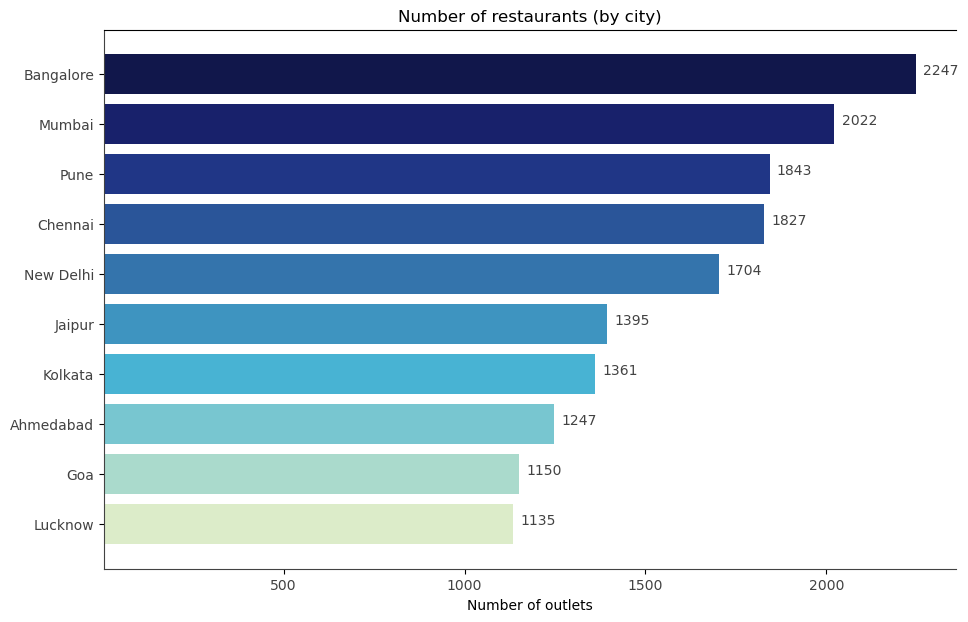

In [56]:
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

As expected, metro cities have more number of restaurants than others with South India dominating the Top 4

#### Average rating, votes and photos (by city)

In [57]:
rating_by_city = data.groupby("city").mean()["aggregate_rating"].sort_values(ascending=False)[:10]
rating_by_city

TypeError: Could not convert BikanervalaMama Chicken Mama Franky HouseBhagat HalwaiBhagat HalwaiThe Salt Cafe Kitchen & BarDomino's PizzaHoneydew RestaurantDomino's PizzaCake HouseSugar N ThymeHichkeeBikanervalaPizza HutYadav Dhaba PuranaAaharDomino's PizzaPinch Of SpiceMc Donald'sGMB - Gopika Sweets & RestaurantThe Greener SideBhagat HalwaiPizza HutPinch Of SpiceJain BhojnalayaPapa Ji Da DhabaChokho Jeeman Marwari Jain BhojanalyaPizza HutUrban DeckDomino's PizzaKiskey WhiskeyManoj RestaurantAmritsari Kulcha JunctionDeviram Food CircleSubwayCafe Turquoise CottageGuru Kripa Yadav DhabaTea'se Me - Rooftop Tea BoutiqueChimmanlal Puri WaleThe Momo CornerJain RestaurantPind BalluchiBhadawar HotelMochaDomino's PizzaCHHAT - Over The TopPari Family RestaurantKFCJahanpanahWhat The FoodShree Balaji Family RestaurantChapter 1 CafeSardar Ji Da DhabaRohit Cakes And BakesThe Big BunQ'sinnThe Masterchef RestaurantAchmanPeshawri - ITC MughalFakiraD'DeliciaCampus BakersThaaliwalaAnant RestaurantOm Sai Ram BhojhnalayaSheroes HangoutFruckBercosRambabu Parantha BhandarG ThalMKOPAgarwal Restaurant Sweets And DairyIndian Chicken ExpressUdupi BrindavanFamily Zaika Restro & LoungeRam Babu Parathe WaleGrey House CafeDeviram Sweets and RestaurantSattolala Food CourtShan E HindCapri RestaurantDasaprakash RestaurantShree Bankey Bihari Misthan BhandarThe ForestChickenwala.comDosa PlazaSocial AttitudeBullet AddaTirupati's Dosa FactoryTemptationAgra Chat HouseBhawna SweetsGurgaonwalaAtlantic FoodsChaat ChowpaatiTaj Bano - ITC MughalCulinary Junction By UdupiChopstixBhagwati DhabaChainessJux PuxBellevue - The Oberoi AmarvilasEsphahan - The Oberoi AmarvilasSkydeck - The Gateway HotelTapas - Jaypee Palace HotelDawat-e-Nawab - Radisson BluInfini – The Sky Lounge - Radisson BluPavilion Café - Jaypee Palace HotelPaatra - Jaypee Palace HotelOasis - Four Points By SheratonPalato - All Day Dining - Radisson BluNorth 27The Bar - The Oberoi AmarvilasKebab-e-queThe Roof Top - Four Points By SheratonThe Sunset Lounge - Hotel Clarks ShirazThe Mughal Room - Hotel Clarks ShirazMughal Pavilion - ITC MughalTurko Mughal - Ramada PlazaC'est Chine - Jaypee Palace HotelLiquid Lounge Bar - Radisson BluMoMo CafeGAD - The Gateway HotelThe Restaurant - Trident HotelThe Grand Buffet - Jaypee Palace HotelAniseRendezvous - Hotel Howard PlazaJhankar - The Gateway HotelMaikhana - ITC MughalSaqui - The Gateway HotelBagh E Bahar Lounge - ITC MughalThe Tequila - Mansingh PalaceThe Bar - Trident HotelShahenshahMaikhanaSheesh Mahal - Mansingh PalaceAlfresco - Trident HotelMughal Bar - Hotel Clarks ShirazMajelissBarbeque NationCake D'orBon BarbecueThe Ccharcoal ChimneyGlassyRipples - Mansingh PalaceBridge - Bhawna Clarks InnNooshSeven Hills Rooftop RestaurantMetro BarThe ChamberThe Pindi AgraUtkarsh Vilas RestaurantRooftop Bar-Be-Que3D Liquid LoungeEmperor RestaurantSaqi BarTmahroosh Bar - Ramada PlazaFolks PubSaumaSUMAC - Hotel Royale' RegentThe Tea Lounge - Jaypee Palace HotelMerry Go RoundStar ChilliKarimsIndian By NatureKesar RestaurantFrontier Multi Cuisine Roof Top RestaurantRoof TopClub ReplayGolden CurryRooftop Light House RestaurantHotel City SquareMughal SpiceClub RushSalt - Pepper RestaurantKuch Bhi - Siri 18Zahraa RestaurantBig DaddyRoofmatesAshoka BarThe Park RestaurantPankhuri RestaurantLattice - Crystal Sarovar PremierePind BalluchiWah! SamosaKaila Ji Coffee HouseBalaji Sweets HouseGuru Ji Paan BhandarLove You ZindagiMast Banarsi PaanKushwah Lassi CornerRavi Patties CornerSadar WalaDesire BakersHealthmafiaRavi Patties & Mocktail PointIccha Veg BiryaniPreetamOm Sai Lassi And Juice CornerShagun CafeSri Dauji RestaurantJackson Egg CornerBurger PointCrazy BurgerAgarwal LassiJai Jhulelal Patties CornerBansal SweetsChai Ka AddaFresh Snacks CafeLaxman Momo's CornerLaxman Momo's CornerCream Bell ShoppeSanjay Food CornerPunjabi TadkaAgra Puri BhandarGhatu Shyam Ji SweetsRiya dairy & fast foodSagar ChowmeinTiwari Bombay Style Bhel and PanipuriBrowneeYash Paties And Juice CornerPraveen Fast Food CentreNew Chetna Store Patties HubVrindavan Pan BhandarMom N MirchiDaily Fresh South IndianHeaven's Cakes & BakesKhan Baba Fruits And Juice CornerJalsa Ice Cream And FaludaShri Balaji Juice BhandarUV Cake HouseTiwari Bombay Food CourtCake RoomShake ValleyRam Cafe & BakersImran Hot Roll CentreQuality Cool Cafe And Cold DrinkHoney ConfectionerySuraj HalwaiKulfi Heeralal -Tundla WaleDayaram Sweets & NamkeenHanno Lala Rabri WaleSoup CentreGoswami  SweetsPracheen PethaPrasadamShri Giraj Chaat BhandaarRS Crazy BitesCottage CafeFood.comNew Vrindavan Pan BhandarBUDDIE'S CAFEBrijwasi Chat BandarRaj dairyChai DoseSri Dauji Mishthan BhandarChinese Food PlazaRadha Swami Chinese Fast FoodRam Shyam Pan BhandarChotu Puri WaleJai Pepsi CafeGrilled And Chilled CafeDelhi Gate Chai PuraniAmratsari NaanSai Juice BhandarFamily FoodsGupta Ji RestaurantGopal Juice CornerOp Bhai Egg And ChowmeinFood.comN K Family RestaurantBharat Petha BhandarVijay Chaat BhandarShake CornerRaju Pan BhandarBalaji JuiceRam Bhai Panchi Petha StoreGanga Khandvi Dhokla HouseCanergyKrishna Bakers And ConfectionersSoup Centrechai ki tapriJain ShakesBalaji Chaat BhandarAnnjal RestaurantGopaldas Pethe WaleThe Chocolate RoomPanchi Petha StoreShree Bankey Bihari Misthan BhandarShree Bankey Bihari Misthan BhandarGoli Vada Pav No. 1Pushpak Misthan Bhandar and SweetShree Bankey Bihari Misthan BhandarThe Grand Gopika Thaal By GMBJux PuxGMB SweetsAromatic NoshDeviram SweetsSubwayFilmy Zayka - Hotel AlleviateSizzling SaltBirjbhog Mishthan BhandarBhadawar HotelPriya RestaurantEating Meeting RestaurantAgra DarbarQuality RestaurantDelhi Darbar RestaurantEspresso CoffeeChaska RestaurantSpice Treat DhabaPunjabi JunctionOnly RestaurantShubham RestaurantRaj Darbar RestaurantQaisar Bagh RestaurantSaket RestaurantGreen Veg ThaliCrush CafeJoney's PlaceBulaki Non Veg PointShanti Food CourtKing of SpiceGreen Leaf RestaurantHazi Ji RestaurantRajmahal RestaurantShri Vinayak Restaurant & Fast FoodApollo RestaurantThe Coffee Shop - Hotel Clarks ShirazBercosNew Riao RestaurantGianiChhabra Bakers and ConfectionersMaya RestaurantLaziz Family RestaurantNew Chinese KingMaharaja RestaurantTareef RestaurantChatori GaliBiryani PointSeth Ji HotelAgarwal Palace RestaurantAgra Food CourtS.R Restaurant & Fast foodNovelty RestaurantToto's The Sky Resto & LoungeChick Chick CornerThe Neelma JointJeetu DhabaShivam RestaurantPunjabi HutThe Delicious RestaurantTunda KababiAnjali RestaurantFoyer Restaurant and CafeChoki Dhani - Rajasthani BhojnalyaBob Marley RestaurantBindhadi Ki RasoiAJ's Cafe & BakeryFauzi DhabaThe Taste of Taj CityThali MasterBurgeroTaj CafeVaishno Balaji DhabaApollo FoodsKohinoor Bar & RestaurantTasty Bite RestaurantAvalon TajTaj Khema RestaurantPehelwan DhabaIndian SpiceChaat WalaMaharaja RestaurantChef On WheelsBambino cafeSwad RestaurantAbdul Sattar Nashte WaleApna DhabhaJanta BhojnalayLick N Bite BakersNew Cake HouseGyani's Snacks CornerRelax He Relax RestaurantFood ParadiseJhalak RestaurantCake & Cafe 11Family ZaikaAggarwal Fast Food & RestaurantRoots CafeChinese DhabaShri Vrindavan SweetKapoor's KitchenTaj SweetsChota Mama Chicken & Mama VegLabbaik Chicken CornerOm BhojanalayaGuru Kripa BhojnalayaChai GaramHungernomia - Daddy's Burger BarBaba Chicken MuttonD Jail House- Hungry SlurpLabbaik Chicken CornerThe Chocolate RoomMaster Chef Italian Fast Food CornerTealogyAnand He Anand BhojanalayaCafe KulhadSri Dauji Mishthan BhandarPizza HubPizza InnDaddy's Burger BarBhagwati Dhaba & ThaliNew Moon Light RestaurantBurger PandaThe Indian ChaskaDasaprakash RestaurantGrill InnManoj DhabaGulati Bar-Be-QueRangrezz RestaurantUP 80Brijwasi Sweet House & RestaurantHari Chatni RestaurantSagar RatnaGalib RestaurantHotel SolitaireShri Thakur Ji BhojanalayaEk Number cafeRaj RasoiSri Dauji's ChatpataaSpice Kitchen - The Sizzling Multi-Cuisine RestaurantRaj RasoiThe Greens Restaurant & Herbal CafeBlue CorianderShere Punjab RestaurantRS Sweets & RestaurantSpicy SpoonLakshmi VilasVintage HouseRestaurant NukkarHotel Amar - Noorjahan RestaurantCafe Golden Elephant - Ramada PlazaThe Masterchef RestaurantGolden China RestaurantWOS Cafe - World of SpicesParklane Hotel & RestaurantThe SignatureThe Star DinerD's Family RestaurantThe ToungeJai Hind RestaurantAgra Zayka Family RestaurantKings SpoonTaj Mahal Family RestaurantFlavours RestaurantShri Ambika RestaurantFizz - Crystal Sarovar PremiereDowntown CafeThor The Party WorldDistil - The Lounge BarRed Eye - Cocktail HouseLights Out - Lounge & RoofparkShri Tirupati No.1 Family RestaurantChef at Home BakeryTwist and tasteYo Yo FoodsMothers MilkshakesUltimate PizzaDosa FactoryRola WalaRolls NationChina TownWhat The FoodRatan PizzaGreeNoxMaster ChefNew Agra Fast Food & RestaurantUnlimited PizzaPotato PlanetOm RestaurantPunjabi SwagKings Pizza And BurgerThe Dhaba CafeSelfie RestaurantYum Yum Vada Pav No.1Mama's Vegetarian Food CornerSips And BitesBhole Kona GrillPradeep StoreChhabra's Chicken CornerLove RestaurantDeviram Sweets & Food PlazaSky Grill - Crystal Sarovar PremierePatiala House Rooftop CafeHangout- The Lounge BarGazal BarDiamond Restaurant And BarMadira BarRegal Bar And RestaurantGaylord RestaurantCocktailsHotel Bengal Lodge Bar & RestaurantFuel BarHotel GayatriCaptain's CafeCafe Coffee DayDECHEN CAFE LOUNGECafe Coffee DayBrothers BistroA Rush CafeHills CafeCosta CoffeeHunger Point Cafe and BakersCafe ChilamCafe GodfatherOMG The Master Chef RestaurantCafe Coffee DayMillenium Motors and CafeBazaar CafeGood Vibes CafeSafarnama CafeTea Lounge - Radisson BluThe Masterchef RestaurantThe Magic BlenderRoyals Cafe Corner RestaurantRoosh CafeEl Clasico CafeY NOT Cafe and restaurantBedweiser CafeLucky's CafeYoungistan CafeCake & MoreNatureloAgarwal Sweets & DairyCake & MoreGiani Ice CreamMKOPFaluda CornerGiani Ice CreamBhagat HalwaiSri Dauji Misthan BhandarPanchi Petha DalmothWaffledWaffledJalsa - Ice Cream & Faluda CornerKings Kulfi And IcecreamMadhu Ice CreamWaffledKulfianoJalsa - Ice Cream & Faluda CornerSwadika SweetsKulfianoKeventorsImperialK.D BakersGiani Ice CreamJalsa - Ice Cream & Faluda CornerKulfianoBhimsain Baij Nath - Dalmoth Pehta WalaShri Ram Faluda CornerShree Jee Sweets And DairyA.M Ice Cream Parlourramu ice-cream storeCelebration  FoodsWatchMeWhipCake HouseGoverdhan BakeryAmbey BakersThe London BakeryBhagwan Corner Cakes And PastriesDreams Bakers ParadiseSanjay Bakers & ConfectionerCake HouseEuropean BakeryVaishno The Cake MakersBhaagya Shree Studio & BakersfnpCakes ‘n’ MoreOm Sai Food CourtDreams Bakers ParadiseCelebration FoodsVaishno BakerySprinkle Bakery And Fast FoodIsha Food PlazaGarg DairyCelebrations FoodsFood TreasureDeep CornerShri Mahaveer Bakery And ConfectioneryPrince BakersBeloved BakersParis BakeryMoon BakersMaharaja Agrasen ConfectioneryAnant Krishna FoodsCake Housechhabra bake house & cafeShri Jagdamba BakersCakeshhRadhey govind bakeryBlue Bird BakersGupta Bakery & Sweet ShopAbhay Cake HouseHoney BakersRahul BakersYuwan Patiz HubDCD Cake HouseBakeologyCake FarmerJain PethaBlue Bird BakersGaurav BakersRajput BakersRahul BakersRaj Milk Product And SweetsDreamzChhabraSwagat BakeryAgarwal BakersYo Yo FoodsTN Bakes And BitesRS Eating HubMoolchand Grocery And BakeryMahaveer BakeryMr. KukoosBlue Bird bakersThakur Nath ConfectionaryParis BakeryMama Cake HouseMonu BakeryKrishna Bakers & ConfectionersS G BakersNarayani BakeryNew Punjabi DhabaMaruti DhabaNew Vishal RestaurantShri Dharamraj Yadav DhabaYadav DhabaNeelam RestaurantGupta Ji Dhaba & Veg BriyaniChatpati RasoiGyani DhabaChanchal HotelAbhishek DhabaJawahar BhojnalayManoj BhojnalayMaa Vaishno DhabaAnand Sakahari BhojnalayKumaun DhabaShri Mangalam DhabhaPunjabi RestaurantShri Anand  Sakahari BhojanVishal DhabaBapu DhabaChacha Ji Chicken Mutton HouseGirraj DhabaVaishno BhojanalayaPehalwan Ji Ka DhabaKhushi DhabhaNational DhabaBarkat DhabaJagdamba DhabaChicken Rasoi DhabhaDev Rajput DhabaBhaiya Ji Family DhabaAshish DhabaAnjali DhabaVaishno Bhojanalaya Chacha HotelShri Thakur Ji Misthan BhandarShree Bankey Bihari SweetSri Dauji Mishthan BhandarAjanta SweetsManohar Lal Daulat Ram Garg Gajak WaleShri Dauji SweetsNew Pushpak Misthan BhandarPanchhi Petha BhandarManohar Lal Daulat Ram Garg Gazak WaleAnil Gajak PalaceSri Dauji Mishthan BhandarSri Dauji Mishthan BhandarPracheen PethaShiv SweetShri Thakur Ji Misthan BhandarSri Dauji Mishthan BhandarMor Mukut Misthan BhandarManohar Lal Daulat Ram Garg Gazak WalePanchhi Petha StoreShri Dauji SweetsShanti SweetsBrijwasi Sweet HouseSri Dauji Mishthan BhandarAgarsen SweetShree Raman Sweet HousePanchhi Petha DalmothNew Agarwal SweetShanti SweetsMunna Lal SweetsPashupati Mishthan & CatersAgarsen SweetsBrijwasi PethaAgra Petha And DalmothMaharaja agrasen dairy and sweetShri Thakur Ji Misthan BhandarJain SweetBrijwasi Sweet HouseAnjali SweetGaurav SweetsShree Bansal Petha BhandharAgarwal Sweet HouseShree Chhappan BhogGovind Ji SweetsHeeralal Rajababu SweetsShri Bankey Bihari Sweet ShopGupta Ji Sweet HouseAgarwal Dairy And SweetOm Sweetsbrijrass misthan bhandharYadav Misthan BhandarShri Krishna Misthan BhandharGopaldas Pethe WaleGupta SweetsJain Sweets & NamkeensRajesh DairyPandit Ji SweetsBansal SweetsKwality SweetsPachori Misthan BhandharJain Sweet And Milk CornerPanchhi Petha NamkeenPracheen PethaAgarwal Sweet HouseHindustan dairy & sweetShree Krishna Murari Misthan BhandarRadhika Sweet CornerShri Parasnath Misthan BhandarSitaram Petha BhandarMithaas Sweets & SnacksKrishna Namkeen and SweetsNew Bala Ji Sweets and MilkBhadawar Sweets & DairyMor Mukut Misthan BhandarKhandelwal SweetKrishna Namkeen and SweetSuper Hemant Petha Store Sweets And NamkeenBalaji SweetsMarleys  The MilkshakeZero Degree - PioK.K Juice HouseJMD Juice and ShakesShri Gopal Doodh BhandarCrazy Juice BarGori Shankar Fruit &  Punchshake CornerSikandar Juice CornerAmrit JuiceManish Fruit Juice CornerAnil Juice CentreThe SliceSky Train RestaurantSS The Party NightBalaji Dosa FactoryChinese DhabaDosa KitchenThug TruckPehalwan Biryani Food TruckShiv Sagar FaludaZalsa ice creamDAUJI chat and kulfi centreZalsa Ice-creamZalsa ice creamChotu Shikanji WalaSonu dosa cornerPunjabi ChulhaMama Franky HouseThe Mud ShakesPunjabi GrillR R Fast Food CornerDeepak Fast FoodLavela Food CornerPandit Ji Biryani WaleJain Chaat BhandarPandit BhojnalayaPandit BhojnalayaPape Di Hatti(Sardari Lal)M/s Guru Mahima Shudh Shakari BhojnalayPandit Ji BhojhnalayaMama Mutton Chicken BhandharShri Shyam Ji Shakahari BhojnalayaBrijwasi BhojnalayaPandit  JI Poori waleChicken Briyani HyderabadiShri Giriraj BhojanalayaShere - Punjab DhabhaNew Shree Ram BhojnalyaShree Shayam Ji BhojnalayaShri Jagdish family dhabhaTammana bhojnalyaPinki BhojnalayaJai Maa Bhawani BhojhnalayaKhushi BhojhnalayaShree Balaji BhojnalayaPooja Family RestaurantShree Balaji BhojnalayaTree House Cafejalsa ice - creamShiv Sagar FaludaDelicious Food PlazaPrem ConfectioneryGopal CanningBanarsi PanMurena Lassi ShopJain juice cornerdauji juice cornerMadsip CafeThikanaJain ConfectionerySpices AffairrBhagat Food CourtHungernomiaShiva BhojhnalayaSagraGreeNoxBrijwasi  Sweets & RestaurantShyam Ji RestaurantUdupi Shri Krishna VilasChef SignaturePrem Bhalla RestaurantShri Agarwal Chat HouseG Chakna- G HotelDasaprakash RestaurantPanchratan RestaurantAgra Bana24*7 Hunger SolutionsThe Silk Route RestaurantFitoor to numeric

In [58]:
# To check the number of outlets in each of the above establishment type

#city_count = data.groupby("city").count()["name"].sort_values(ascending=False)
#rating_by_city_map = city_count.index.isin(rating_by_city.index)
#city_count = city_count[rating_by_city_map][rating_by_city.index]
#city_count

In [59]:
data.groupby("city").mean()["votes"].sort_values(ascending=False)[:10]

TypeError: Could not convert BikanervalaMama Chicken Mama Franky HouseBhagat HalwaiBhagat HalwaiThe Salt Cafe Kitchen & BarDomino's PizzaHoneydew RestaurantDomino's PizzaCake HouseSugar N ThymeHichkeeBikanervalaPizza HutYadav Dhaba PuranaAaharDomino's PizzaPinch Of SpiceMc Donald'sGMB - Gopika Sweets & RestaurantThe Greener SideBhagat HalwaiPizza HutPinch Of SpiceJain BhojnalayaPapa Ji Da DhabaChokho Jeeman Marwari Jain BhojanalyaPizza HutUrban DeckDomino's PizzaKiskey WhiskeyManoj RestaurantAmritsari Kulcha JunctionDeviram Food CircleSubwayCafe Turquoise CottageGuru Kripa Yadav DhabaTea'se Me - Rooftop Tea BoutiqueChimmanlal Puri WaleThe Momo CornerJain RestaurantPind BalluchiBhadawar HotelMochaDomino's PizzaCHHAT - Over The TopPari Family RestaurantKFCJahanpanahWhat The FoodShree Balaji Family RestaurantChapter 1 CafeSardar Ji Da DhabaRohit Cakes And BakesThe Big BunQ'sinnThe Masterchef RestaurantAchmanPeshawri - ITC MughalFakiraD'DeliciaCampus BakersThaaliwalaAnant RestaurantOm Sai Ram BhojhnalayaSheroes HangoutFruckBercosRambabu Parantha BhandarG ThalMKOPAgarwal Restaurant Sweets And DairyIndian Chicken ExpressUdupi BrindavanFamily Zaika Restro & LoungeRam Babu Parathe WaleGrey House CafeDeviram Sweets and RestaurantSattolala Food CourtShan E HindCapri RestaurantDasaprakash RestaurantShree Bankey Bihari Misthan BhandarThe ForestChickenwala.comDosa PlazaSocial AttitudeBullet AddaTirupati's Dosa FactoryTemptationAgra Chat HouseBhawna SweetsGurgaonwalaAtlantic FoodsChaat ChowpaatiTaj Bano - ITC MughalCulinary Junction By UdupiChopstixBhagwati DhabaChainessJux PuxBellevue - The Oberoi AmarvilasEsphahan - The Oberoi AmarvilasSkydeck - The Gateway HotelTapas - Jaypee Palace HotelDawat-e-Nawab - Radisson BluInfini – The Sky Lounge - Radisson BluPavilion Café - Jaypee Palace HotelPaatra - Jaypee Palace HotelOasis - Four Points By SheratonPalato - All Day Dining - Radisson BluNorth 27The Bar - The Oberoi AmarvilasKebab-e-queThe Roof Top - Four Points By SheratonThe Sunset Lounge - Hotel Clarks ShirazThe Mughal Room - Hotel Clarks ShirazMughal Pavilion - ITC MughalTurko Mughal - Ramada PlazaC'est Chine - Jaypee Palace HotelLiquid Lounge Bar - Radisson BluMoMo CafeGAD - The Gateway HotelThe Restaurant - Trident HotelThe Grand Buffet - Jaypee Palace HotelAniseRendezvous - Hotel Howard PlazaJhankar - The Gateway HotelMaikhana - ITC MughalSaqui - The Gateway HotelBagh E Bahar Lounge - ITC MughalThe Tequila - Mansingh PalaceThe Bar - Trident HotelShahenshahMaikhanaSheesh Mahal - Mansingh PalaceAlfresco - Trident HotelMughal Bar - Hotel Clarks ShirazMajelissBarbeque NationCake D'orBon BarbecueThe Ccharcoal ChimneyGlassyRipples - Mansingh PalaceBridge - Bhawna Clarks InnNooshSeven Hills Rooftop RestaurantMetro BarThe ChamberThe Pindi AgraUtkarsh Vilas RestaurantRooftop Bar-Be-Que3D Liquid LoungeEmperor RestaurantSaqi BarTmahroosh Bar - Ramada PlazaFolks PubSaumaSUMAC - Hotel Royale' RegentThe Tea Lounge - Jaypee Palace HotelMerry Go RoundStar ChilliKarimsIndian By NatureKesar RestaurantFrontier Multi Cuisine Roof Top RestaurantRoof TopClub ReplayGolden CurryRooftop Light House RestaurantHotel City SquareMughal SpiceClub RushSalt - Pepper RestaurantKuch Bhi - Siri 18Zahraa RestaurantBig DaddyRoofmatesAshoka BarThe Park RestaurantPankhuri RestaurantLattice - Crystal Sarovar PremierePind BalluchiWah! SamosaKaila Ji Coffee HouseBalaji Sweets HouseGuru Ji Paan BhandarLove You ZindagiMast Banarsi PaanKushwah Lassi CornerRavi Patties CornerSadar WalaDesire BakersHealthmafiaRavi Patties & Mocktail PointIccha Veg BiryaniPreetamOm Sai Lassi And Juice CornerShagun CafeSri Dauji RestaurantJackson Egg CornerBurger PointCrazy BurgerAgarwal LassiJai Jhulelal Patties CornerBansal SweetsChai Ka AddaFresh Snacks CafeLaxman Momo's CornerLaxman Momo's CornerCream Bell ShoppeSanjay Food CornerPunjabi TadkaAgra Puri BhandarGhatu Shyam Ji SweetsRiya dairy & fast foodSagar ChowmeinTiwari Bombay Style Bhel and PanipuriBrowneeYash Paties And Juice CornerPraveen Fast Food CentreNew Chetna Store Patties HubVrindavan Pan BhandarMom N MirchiDaily Fresh South IndianHeaven's Cakes & BakesKhan Baba Fruits And Juice CornerJalsa Ice Cream And FaludaShri Balaji Juice BhandarUV Cake HouseTiwari Bombay Food CourtCake RoomShake ValleyRam Cafe & BakersImran Hot Roll CentreQuality Cool Cafe And Cold DrinkHoney ConfectionerySuraj HalwaiKulfi Heeralal -Tundla WaleDayaram Sweets & NamkeenHanno Lala Rabri WaleSoup CentreGoswami  SweetsPracheen PethaPrasadamShri Giraj Chaat BhandaarRS Crazy BitesCottage CafeFood.comNew Vrindavan Pan BhandarBUDDIE'S CAFEBrijwasi Chat BandarRaj dairyChai DoseSri Dauji Mishthan BhandarChinese Food PlazaRadha Swami Chinese Fast FoodRam Shyam Pan BhandarChotu Puri WaleJai Pepsi CafeGrilled And Chilled CafeDelhi Gate Chai PuraniAmratsari NaanSai Juice BhandarFamily FoodsGupta Ji RestaurantGopal Juice CornerOp Bhai Egg And ChowmeinFood.comN K Family RestaurantBharat Petha BhandarVijay Chaat BhandarShake CornerRaju Pan BhandarBalaji JuiceRam Bhai Panchi Petha StoreGanga Khandvi Dhokla HouseCanergyKrishna Bakers And ConfectionersSoup Centrechai ki tapriJain ShakesBalaji Chaat BhandarAnnjal RestaurantGopaldas Pethe WaleThe Chocolate RoomPanchi Petha StoreShree Bankey Bihari Misthan BhandarShree Bankey Bihari Misthan BhandarGoli Vada Pav No. 1Pushpak Misthan Bhandar and SweetShree Bankey Bihari Misthan BhandarThe Grand Gopika Thaal By GMBJux PuxGMB SweetsAromatic NoshDeviram SweetsSubwayFilmy Zayka - Hotel AlleviateSizzling SaltBirjbhog Mishthan BhandarBhadawar HotelPriya RestaurantEating Meeting RestaurantAgra DarbarQuality RestaurantDelhi Darbar RestaurantEspresso CoffeeChaska RestaurantSpice Treat DhabaPunjabi JunctionOnly RestaurantShubham RestaurantRaj Darbar RestaurantQaisar Bagh RestaurantSaket RestaurantGreen Veg ThaliCrush CafeJoney's PlaceBulaki Non Veg PointShanti Food CourtKing of SpiceGreen Leaf RestaurantHazi Ji RestaurantRajmahal RestaurantShri Vinayak Restaurant & Fast FoodApollo RestaurantThe Coffee Shop - Hotel Clarks ShirazBercosNew Riao RestaurantGianiChhabra Bakers and ConfectionersMaya RestaurantLaziz Family RestaurantNew Chinese KingMaharaja RestaurantTareef RestaurantChatori GaliBiryani PointSeth Ji HotelAgarwal Palace RestaurantAgra Food CourtS.R Restaurant & Fast foodNovelty RestaurantToto's The Sky Resto & LoungeChick Chick CornerThe Neelma JointJeetu DhabaShivam RestaurantPunjabi HutThe Delicious RestaurantTunda KababiAnjali RestaurantFoyer Restaurant and CafeChoki Dhani - Rajasthani BhojnalyaBob Marley RestaurantBindhadi Ki RasoiAJ's Cafe & BakeryFauzi DhabaThe Taste of Taj CityThali MasterBurgeroTaj CafeVaishno Balaji DhabaApollo FoodsKohinoor Bar & RestaurantTasty Bite RestaurantAvalon TajTaj Khema RestaurantPehelwan DhabaIndian SpiceChaat WalaMaharaja RestaurantChef On WheelsBambino cafeSwad RestaurantAbdul Sattar Nashte WaleApna DhabhaJanta BhojnalayLick N Bite BakersNew Cake HouseGyani's Snacks CornerRelax He Relax RestaurantFood ParadiseJhalak RestaurantCake & Cafe 11Family ZaikaAggarwal Fast Food & RestaurantRoots CafeChinese DhabaShri Vrindavan SweetKapoor's KitchenTaj SweetsChota Mama Chicken & Mama VegLabbaik Chicken CornerOm BhojanalayaGuru Kripa BhojnalayaChai GaramHungernomia - Daddy's Burger BarBaba Chicken MuttonD Jail House- Hungry SlurpLabbaik Chicken CornerThe Chocolate RoomMaster Chef Italian Fast Food CornerTealogyAnand He Anand BhojanalayaCafe KulhadSri Dauji Mishthan BhandarPizza HubPizza InnDaddy's Burger BarBhagwati Dhaba & ThaliNew Moon Light RestaurantBurger PandaThe Indian ChaskaDasaprakash RestaurantGrill InnManoj DhabaGulati Bar-Be-QueRangrezz RestaurantUP 80Brijwasi Sweet House & RestaurantHari Chatni RestaurantSagar RatnaGalib RestaurantHotel SolitaireShri Thakur Ji BhojanalayaEk Number cafeRaj RasoiSri Dauji's ChatpataaSpice Kitchen - The Sizzling Multi-Cuisine RestaurantRaj RasoiThe Greens Restaurant & Herbal CafeBlue CorianderShere Punjab RestaurantRS Sweets & RestaurantSpicy SpoonLakshmi VilasVintage HouseRestaurant NukkarHotel Amar - Noorjahan RestaurantCafe Golden Elephant - Ramada PlazaThe Masterchef RestaurantGolden China RestaurantWOS Cafe - World of SpicesParklane Hotel & RestaurantThe SignatureThe Star DinerD's Family RestaurantThe ToungeJai Hind RestaurantAgra Zayka Family RestaurantKings SpoonTaj Mahal Family RestaurantFlavours RestaurantShri Ambika RestaurantFizz - Crystal Sarovar PremiereDowntown CafeThor The Party WorldDistil - The Lounge BarRed Eye - Cocktail HouseLights Out - Lounge & RoofparkShri Tirupati No.1 Family RestaurantChef at Home BakeryTwist and tasteYo Yo FoodsMothers MilkshakesUltimate PizzaDosa FactoryRola WalaRolls NationChina TownWhat The FoodRatan PizzaGreeNoxMaster ChefNew Agra Fast Food & RestaurantUnlimited PizzaPotato PlanetOm RestaurantPunjabi SwagKings Pizza And BurgerThe Dhaba CafeSelfie RestaurantYum Yum Vada Pav No.1Mama's Vegetarian Food CornerSips And BitesBhole Kona GrillPradeep StoreChhabra's Chicken CornerLove RestaurantDeviram Sweets & Food PlazaSky Grill - Crystal Sarovar PremierePatiala House Rooftop CafeHangout- The Lounge BarGazal BarDiamond Restaurant And BarMadira BarRegal Bar And RestaurantGaylord RestaurantCocktailsHotel Bengal Lodge Bar & RestaurantFuel BarHotel GayatriCaptain's CafeCafe Coffee DayDECHEN CAFE LOUNGECafe Coffee DayBrothers BistroA Rush CafeHills CafeCosta CoffeeHunger Point Cafe and BakersCafe ChilamCafe GodfatherOMG The Master Chef RestaurantCafe Coffee DayMillenium Motors and CafeBazaar CafeGood Vibes CafeSafarnama CafeTea Lounge - Radisson BluThe Masterchef RestaurantThe Magic BlenderRoyals Cafe Corner RestaurantRoosh CafeEl Clasico CafeY NOT Cafe and restaurantBedweiser CafeLucky's CafeYoungistan CafeCake & MoreNatureloAgarwal Sweets & DairyCake & MoreGiani Ice CreamMKOPFaluda CornerGiani Ice CreamBhagat HalwaiSri Dauji Misthan BhandarPanchi Petha DalmothWaffledWaffledJalsa - Ice Cream & Faluda CornerKings Kulfi And IcecreamMadhu Ice CreamWaffledKulfianoJalsa - Ice Cream & Faluda CornerSwadika SweetsKulfianoKeventorsImperialK.D BakersGiani Ice CreamJalsa - Ice Cream & Faluda CornerKulfianoBhimsain Baij Nath - Dalmoth Pehta WalaShri Ram Faluda CornerShree Jee Sweets And DairyA.M Ice Cream Parlourramu ice-cream storeCelebration  FoodsWatchMeWhipCake HouseGoverdhan BakeryAmbey BakersThe London BakeryBhagwan Corner Cakes And PastriesDreams Bakers ParadiseSanjay Bakers & ConfectionerCake HouseEuropean BakeryVaishno The Cake MakersBhaagya Shree Studio & BakersfnpCakes ‘n’ MoreOm Sai Food CourtDreams Bakers ParadiseCelebration FoodsVaishno BakerySprinkle Bakery And Fast FoodIsha Food PlazaGarg DairyCelebrations FoodsFood TreasureDeep CornerShri Mahaveer Bakery And ConfectioneryPrince BakersBeloved BakersParis BakeryMoon BakersMaharaja Agrasen ConfectioneryAnant Krishna FoodsCake Housechhabra bake house & cafeShri Jagdamba BakersCakeshhRadhey govind bakeryBlue Bird BakersGupta Bakery & Sweet ShopAbhay Cake HouseHoney BakersRahul BakersYuwan Patiz HubDCD Cake HouseBakeologyCake FarmerJain PethaBlue Bird BakersGaurav BakersRajput BakersRahul BakersRaj Milk Product And SweetsDreamzChhabraSwagat BakeryAgarwal BakersYo Yo FoodsTN Bakes And BitesRS Eating HubMoolchand Grocery And BakeryMahaveer BakeryMr. KukoosBlue Bird bakersThakur Nath ConfectionaryParis BakeryMama Cake HouseMonu BakeryKrishna Bakers & ConfectionersS G BakersNarayani BakeryNew Punjabi DhabaMaruti DhabaNew Vishal RestaurantShri Dharamraj Yadav DhabaYadav DhabaNeelam RestaurantGupta Ji Dhaba & Veg BriyaniChatpati RasoiGyani DhabaChanchal HotelAbhishek DhabaJawahar BhojnalayManoj BhojnalayMaa Vaishno DhabaAnand Sakahari BhojnalayKumaun DhabaShri Mangalam DhabhaPunjabi RestaurantShri Anand  Sakahari BhojanVishal DhabaBapu DhabaChacha Ji Chicken Mutton HouseGirraj DhabaVaishno BhojanalayaPehalwan Ji Ka DhabaKhushi DhabhaNational DhabaBarkat DhabaJagdamba DhabaChicken Rasoi DhabhaDev Rajput DhabaBhaiya Ji Family DhabaAshish DhabaAnjali DhabaVaishno Bhojanalaya Chacha HotelShri Thakur Ji Misthan BhandarShree Bankey Bihari SweetSri Dauji Mishthan BhandarAjanta SweetsManohar Lal Daulat Ram Garg Gajak WaleShri Dauji SweetsNew Pushpak Misthan BhandarPanchhi Petha BhandarManohar Lal Daulat Ram Garg Gazak WaleAnil Gajak PalaceSri Dauji Mishthan BhandarSri Dauji Mishthan BhandarPracheen PethaShiv SweetShri Thakur Ji Misthan BhandarSri Dauji Mishthan BhandarMor Mukut Misthan BhandarManohar Lal Daulat Ram Garg Gazak WalePanchhi Petha StoreShri Dauji SweetsShanti SweetsBrijwasi Sweet HouseSri Dauji Mishthan BhandarAgarsen SweetShree Raman Sweet HousePanchhi Petha DalmothNew Agarwal SweetShanti SweetsMunna Lal SweetsPashupati Mishthan & CatersAgarsen SweetsBrijwasi PethaAgra Petha And DalmothMaharaja agrasen dairy and sweetShri Thakur Ji Misthan BhandarJain SweetBrijwasi Sweet HouseAnjali SweetGaurav SweetsShree Bansal Petha BhandharAgarwal Sweet HouseShree Chhappan BhogGovind Ji SweetsHeeralal Rajababu SweetsShri Bankey Bihari Sweet ShopGupta Ji Sweet HouseAgarwal Dairy And SweetOm Sweetsbrijrass misthan bhandharYadav Misthan BhandarShri Krishna Misthan BhandharGopaldas Pethe WaleGupta SweetsJain Sweets & NamkeensRajesh DairyPandit Ji SweetsBansal SweetsKwality SweetsPachori Misthan BhandharJain Sweet And Milk CornerPanchhi Petha NamkeenPracheen PethaAgarwal Sweet HouseHindustan dairy & sweetShree Krishna Murari Misthan BhandarRadhika Sweet CornerShri Parasnath Misthan BhandarSitaram Petha BhandarMithaas Sweets & SnacksKrishna Namkeen and SweetsNew Bala Ji Sweets and MilkBhadawar Sweets & DairyMor Mukut Misthan BhandarKhandelwal SweetKrishna Namkeen and SweetSuper Hemant Petha Store Sweets And NamkeenBalaji SweetsMarleys  The MilkshakeZero Degree - PioK.K Juice HouseJMD Juice and ShakesShri Gopal Doodh BhandarCrazy Juice BarGori Shankar Fruit &  Punchshake CornerSikandar Juice CornerAmrit JuiceManish Fruit Juice CornerAnil Juice CentreThe SliceSky Train RestaurantSS The Party NightBalaji Dosa FactoryChinese DhabaDosa KitchenThug TruckPehalwan Biryani Food TruckShiv Sagar FaludaZalsa ice creamDAUJI chat and kulfi centreZalsa Ice-creamZalsa ice creamChotu Shikanji WalaSonu dosa cornerPunjabi ChulhaMama Franky HouseThe Mud ShakesPunjabi GrillR R Fast Food CornerDeepak Fast FoodLavela Food CornerPandit Ji Biryani WaleJain Chaat BhandarPandit BhojnalayaPandit BhojnalayaPape Di Hatti(Sardari Lal)M/s Guru Mahima Shudh Shakari BhojnalayPandit Ji BhojhnalayaMama Mutton Chicken BhandharShri Shyam Ji Shakahari BhojnalayaBrijwasi BhojnalayaPandit  JI Poori waleChicken Briyani HyderabadiShri Giriraj BhojanalayaShere - Punjab DhabhaNew Shree Ram BhojnalyaShree Shayam Ji BhojnalayaShri Jagdish family dhabhaTammana bhojnalyaPinki BhojnalayaJai Maa Bhawani BhojhnalayaKhushi BhojhnalayaShree Balaji BhojnalayaPooja Family RestaurantShree Balaji BhojnalayaTree House Cafejalsa ice - creamShiv Sagar FaludaDelicious Food PlazaPrem ConfectioneryGopal CanningBanarsi PanMurena Lassi ShopJain juice cornerdauji juice cornerMadsip CafeThikanaJain ConfectionerySpices AffairrBhagat Food CourtHungernomiaShiva BhojhnalayaSagraGreeNoxBrijwasi  Sweets & RestaurantShyam Ji RestaurantUdupi Shri Krishna VilasChef SignaturePrem Bhalla RestaurantShri Agarwal Chat HouseG Chakna- G HotelDasaprakash RestaurantPanchratan RestaurantAgra Bana24*7 Hunger SolutionsThe Silk Route RestaurantFitoor to numeric

In [65]:
data.groupby("city").mean()["photo_count"].sort_values(ascending=False)[:10]

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64

Gurgaon has highest rated restaurants whereas Hyderabad has more number of critics. Mumbai and New Delhi dominates for most photo uploads per outlet.

### Cuisine
#### Unique cuisines

In [66]:
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


#### Number of restaurants (by cuisine)

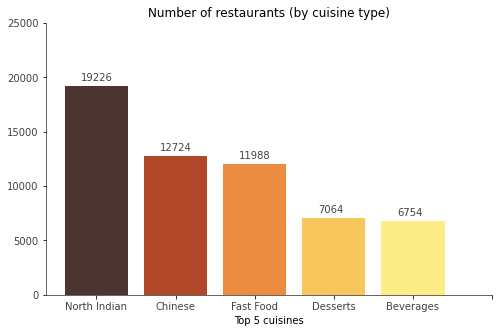

In [67]:
c_count = cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")


plt.show()

Surprisingly, Chinese food comes second in the list of cuisines that Indians prefer, even more than fast food, desserts and South Indian food.
#### Highest rated cuisines

In [68]:
data["cuisines2"] = data['cuisines'].apply(lambda x : x.split(", "))

cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])

In [69]:
for i, x in data.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        c_and_r.loc[j]["Total"] += 1

In [70]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
North Indian,60055.2,19226.0,3.123645
South Indian,18635.3,6381.0,2.920436
Mithai,8545.7,3144.0,2.718098
Street Food,10794.6,3715.0,2.905680
Desserts,22723.9,7064.0,3.216860
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


In [71]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Egyptian,4.416667,6.0
Poké,4.350000,12.0
Fusion,4.350000,2.0
International,4.300000,1.0
Tex-Mex,4.293939,33.0
Singaporean,4.287500,16.0
Moroccan,4.258333,12.0
Sushi,4.206087,115.0
Greek,4.159091,22.0
Mediterranean,4.130275,327.0


We can ignore a few cuisines in this list since they are available in less number. But the overall conclusion which can be drawn is that International (and rarely available) cuisines are rated higher than local cuisines.
### Highlights/Features of restaurants
#### Unique highlights

In [72]:
print("Total number of unique cuisines = ", hl.nunique())

Total number of unique cuisines =  104


#### Number of restaurants (by highlights)

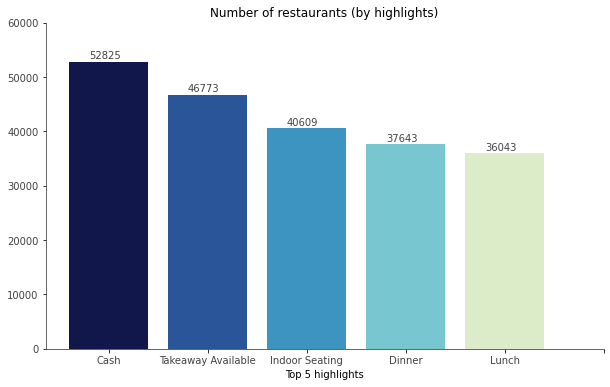

In [73]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()

Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant. Let's look at uncommon highlights that matter more to the customers.
#### Highest rated highlights

In [74]:
data["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [75]:
data["highlights2"] = data['highlights'].apply(lambda x : x[2:-2].split("', '"))

hl_list = hl.unique().tolist()
zeros = np.zeros(shape=(len(hl_list),2))
h_and_r = pd.DataFrame(zeros, index=hl_list, columns=["Sum","Total"])

In [76]:
for i, x in data.iterrows():
    for j in x["highlights2"]:
        h_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        h_and_r.loc[j]["Total"] += 1

In [77]:
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r

,Sum,Total,Mean
Lunch,113340.8,36043.0,3.144600
Takeaway Available,139848.5,46773.0,2.989941
Credit Card,94107.2,27530.0,3.418351
Dinner,118364.5,37643.0,3.144396
Cash,157862.8,52825.0,2.988411
...,...,...,...
Celebrity Frequented,90.1,22.0,4.095455
Alipay Accepted,3.0,1.0,3.000000
Subscription Available,4.1,1.0,4.100000
Subscription Required,4.5,1.0,4.500000


In [78]:
h_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Subscription Required,4.500000,1.0
Speakeasy,4.300000,3.0
Gastro Pub,4.198551,69.0
Craft Beer,4.197297,148.0
Romantic Dining,4.162416,149.0
Sneakpeek,4.128316,392.0
Subscription Available,4.100000,1.0
Celebrity Frequented,4.095455,22.0
Keto Options,4.049153,59.0
Pet Friendly,4.017576,165.0


We can safely ignore highlights which have a frequency of less than 10 since they can be considered as outliers. Features like Gastro pub, Craft beer, Romantic dining and Sneakpeek are well received among customers.

#### Highlights wordcloud
Here we will create a wordcloud of top 30 highlights

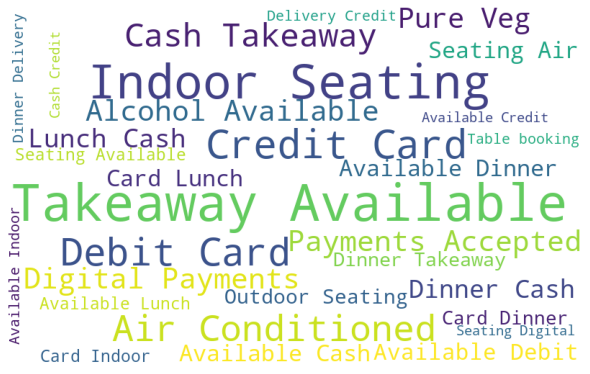

In [79]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Ratings and cost
#### Ratings distribution
Let's see how the ratings are distributes

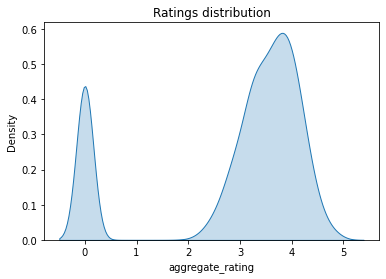

In [80]:
sns.kdeplot(data['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

There is a huge spike at 0 which might account for newly opened or unrated restaurants. On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4.
#### Avergae cost for two distribution

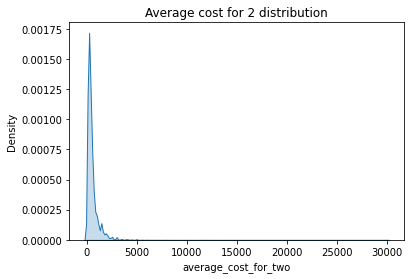

In [81]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

With few restaurants charging average of Rs.25000+ for two, this graph is extremely skewed. Let's take a closer look at a lower range of 0 to 60000.

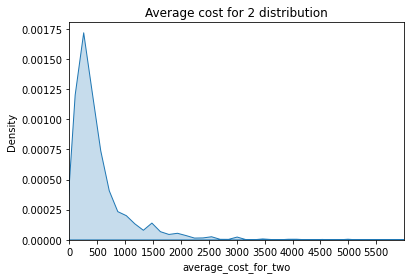

In [82]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

Majority of restaurants are budget friendly with an average cost between Rs.250 to Rs.800 for two.

#### Price range count

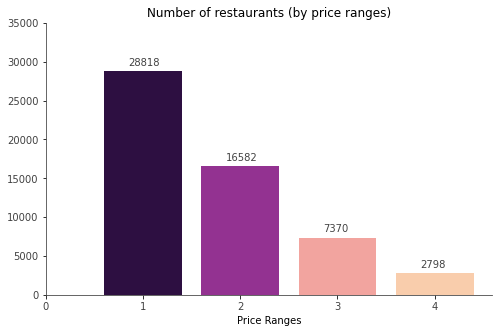

In [83]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()

Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range.

#### Relation between Average price for two and Rating

In [84]:
np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)

0.25

A correlation can be seen between restaurant average cost and rating

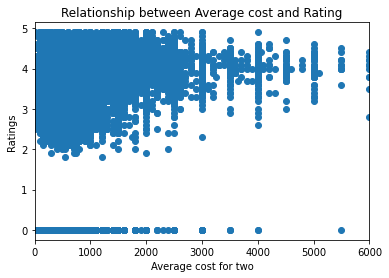

In [85]:
plt.plot("average_cost_for_two","aggregate_rating", data=data, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

There is definetely a direct relation between the two. Let's take a smaller sample to draw a clearer scatter plot.

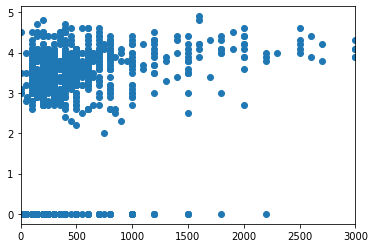

In [86]:
plt.plot("average_cost_for_two","aggregate_rating", data=data.sample(1000), linestyle="none", marker="o")
plt.xlim([0,3000])
plt.show()

This relation concludes that that as average cost for two increases, there is a better chance that the restaurant will be rated highly. Let's look at price range for a better comparison.

#### Relation between Price range and Rating

In [87]:
np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)

0.25

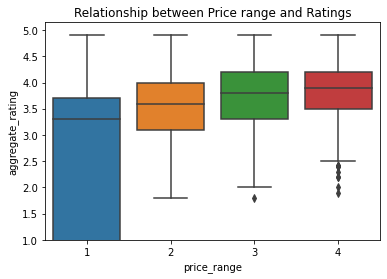

In [88]:
sns.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.

## Conclusions

After working on this data, we can conclude the following things:-
1. Approx. 35% of restaurants in India are part of some chain
2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3. Barbecues and Grill food chains have highest average ratings than other type of restaurants 
4. Quick bites and casual dining type of establishment have most number of outlets
5. Establishments with alcohol availability have highest average ratings, votes and photo uploads
6. Banglore has most number of restaurants 
7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet
8. After North Indian, Chinese is the most prefered cuisine in India
9. International cuisines are better rated than local cuisines
10. Gastro pub, Romantic Dining and Craft Beer features are well rated by customers
11. Most restaurants are rated between 3 and 4
12. Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
13. There are less number of restaurants at higher price ranges
14. As the average cost of two increases, the chance of a restaurant having higher rating increases

Now we have come to the end of this project, I hope you learned some new tricks. 

<b>Please give this notebook an upvote if you find it useful!</b>

In [89]:
data.to_csv("zomato_final.csv")